In [134]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as RForest
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay as display

## Section 1: Data Preprocessing

In [2]:
#load dataframe
characters_raw = pd.read_csv('superheroes_nlp_dataset.csv.zip', compression = 'zip')
characters_raw.head()

name               real_name               full_name  \
0        3-D Man     Delroy Garrett, Jr.     Delroy Garrett, Jr.   
1  514A (Gotham)             Bruce Wayne                     NaN   
2         A-Bomb  Richard Milhouse Jones  Richard Milhouse Jones   
3             Aa                      Aa                     NaN   
4     Aaron Cash              Aaron Cash              Aaron Cash   

  overall_score                                       history_text  \
0             6  Delroy Garrett, Jr. grew up to become a track ...   
1            10  He was one of the many prisoners of Indian Hil...   
2            20   Richard "Rick" Jones was orphaned at a young ...   
3            12  Aa is one of the more passive members of the P...   
4             5  Aaron Cash is the head of security at Arkham A...   

                                         powers_text  intelligence_score  \
0                                                NaN                  85   
1                                                NaN                 100   
2    On rare occasions, and through unusual circu...                  80   
3                                                NaN                  80   
4                                                NaN                  80   

   strength_score  speed_score  durability_score  ...  has_flight  \
0              30           60                60  ...         0.0   
1              20           30                50  ...         0.0   
2             100           80               100  ...         0.0   
3              50           55                45  ...         0.0   
4              10           25                40  ...         0.0   

   has_accelerated_healing has_weapons_master has_intelligence has_reflexes  \
0                      0.0                0.0              0.0          0.0   
1                      0.0                0.0              0.0          1.0   
2                      1.0                0.0              0.0          1.0   
3                      0.0                0.0              0.0          0.0   
4                      0.0                1.0              0.0          0.0   

  has_super_speed has_durability has_stamina has_agility has_super_strength  
0             1.0            0.0         0.0         0.0                1.0  
1             0.0            1.0         0.0         0.0                1.0  
2             1.0            1.0         1.0         1.0                1.0  
3             0.0            0.0         0.0         0.0                0.0  
4             0.0            0.0         0.0         0.0                0.0  

[5 rows x 81 columns]

In [3]:
characters_raw.tail()

name       real_name       full_name overall_score  \
1445        Zatanna  Zatanna Zatara  Zatanna Zatara            10   
1446           Zero     DWN-∞: Zero     DWN-∞: Zero            18   
1447  Zoom (New 52)  Hunter Zolomon             NaN            20   
1448           Zoom  Hunter Zolomon  Hunter Zolomon             9   
1449          Zzzax             NaN             NaN             5   

                                           history_text  \
1445  Zatanna is the daughter of adventurer John Zat...   
1446   Zero was created by the late Dr. Albert Wily ...   
1447  Hunter Zolomon is better known as Zoom, a spee...   
1448   Hunter Zolomon had a troubled relationship wi...   
1449  Zzzax was the product of an accident that occu...   

                                            powers_text  intelligence_score  \
1445   Zatanna is genetically talented with her magi...                  90   
1446                                                NaN                  80   
1447  After tricking Barry Allen and Wally West into...                  95   
1448  Zoom is able to alter time, to make himself ev...                  75   
1449                                                NaN                  45   

      strength_score  speed_score  durability_score  ...  has_flight  \
1445              10           25                30  ...         0.0   
1446             100          100               100  ...         0.0   
1447              50          100                75  ...         0.0   
1448              10          100                30  ...         0.0   
1449              80           75                95  ...         1.0   

      has_accelerated_healing has_weapons_master has_intelligence  \
1445                      0.0                0.0              0.0   
1446                      1.0                1.0              1.0   
1447                      1.0                0.0              1.0   
1448                      0.0                0.0              0.0   
1449                      0.0                0.0              0.0   

     has_reflexes has_super_speed has_durability has_stamina has_agility  \
1445          0.0             0.0            0.0         0.0         0.0   
1446          1.0             1.0            1.0         1.0         1.0   
1447          1.0             1.0            1.0         1.0         1.0   
1448          0.0             1.0            0.0         0.0         0.0   
1449          0.0             1.0            0.0         0.0         1.0   

     has_super_strength  
1445                0.0  
1446                1.0  
1447                1.0  
1448                0.0  
1449                1.0  

[5 rows x 81 columns]

In [4]:
#size of dataframe
print(characters_raw.shape)

#view columns
print(characters_raw.columns)

(1450, 81)
Index(['name', 'real_name', 'full_name', 'overall_score', 'history_text',
       'powers_text', 'intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score', 'superpowers',
       'alter_egos', 'aliases', 'place_of_birth', 'first_appearance',
       'creator', 'alignment', 'occupation', 'base', 'teams', 'relatives',
       'gender', 'type_race', 'height', 'weight', 'eye_color', 'hair_color',
       'skin_color', 'img', 'has_electrokinesis', 'has_energy_constructs',
       'has_mind_control_resistance', 'has_matter_manipulation',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_dimensional_travel', 'has_element_control', 'has_size_changing',
       'has_fire_resistance', 'has_fire_control', 'has_dexterity',
       'has_reality_warping', 'has_illusions', 'has_energy_beams',
       'has_peak_human_condition', 'has_shapeshifting', 'has_heat_resistance',
       'has_jump', 'has_self-suste

### 1.1: Removing Null Values

In [5]:
#find charracters with missing names
characters_raw[characters_raw['name'].isnull()]

name real_name full_name overall_score  \
283  NaN       NaN       NaN             -   
398  NaN       NaN       NaN             -   

                                          history_text  \
283  Dmitri Smerdyakov was the illegitimate son of ...   
398                                                NaN   

                                           powers_text  intelligence_score  \
283  The Chameleon can instantly change his appeara...                   0   
398  None known except that he may possess the abil...                   0   

     strength_score  speed_score  durability_score  ...  has_flight  \
283               0            0                 0  ...         NaN   
398               0            0                 0  ...         NaN   

     has_accelerated_healing has_weapons_master has_intelligence has_reflexes  \
283                      NaN                NaN              NaN          NaN   
398                      NaN                NaN              NaN          NaN   

    has_super_speed has_durability has_stamina has_agility has_super_strength  
283             NaN            NaN         NaN         NaN                NaN  
398             NaN            NaN         NaN         NaN                NaN  

[2 rows x 81 columns]

In [6]:
# remove null names and reindex
index = characters_raw[characters_raw['name'].isnull()].index.tolist()
all_characters = characters_raw.drop(index)
all_characters = all_characters.reset_index(drop = True)
print(len(all_characters))

1448


In [7]:
#check if the characters are unique
len(all_characters['name'].unique())

1448

In [8]:
# remove nan values for gender and alignment
index = all_characters[all_characters['gender'].isnull()].index.tolist()
index2 = all_characters[all_characters['alignment'].isnull()].index.tolist()
index = list(set(index + index2))
characters = all_characters.drop(index)
characters = characters.reset_index(drop = True)
len(characters)

1266

In [9]:
#check if nan values were removed
print(characters['gender'].unique())
print(characters['alignment'].unique())

['Male' 'Female']
['Good' 'Bad' 'Neutral']


In [10]:
# features of interest by category
score = characters.filter(regex='score').columns[1:] #overall score is different from actual SHDb calculations
physical = ['type_race', 'height', 'weight', 'eye_color', 'hair_color','skin_color']
ability = characters.filter(regex='has_').columns

In [11]:
# check for null values in score features
len(characters[characters[score].isnull().sum(axis = 1) != 0])

0

In [12]:
# check for null values in physical features
for p in physical:
    print(p ,": " ,sum(characters[p].isnull()), sep = "")
print("total characters: ", len(characters), sep = "")

type_race: 291
height: 0
weight: 0
eye_color: 166
hair_color: 153
skin_color: 1104
total characters: 1266


In [13]:
# skin color has too many missing values
physical = physical[:-1]

In [14]:
# index where at least one physical value is missing
index = []
for p in physical:
    p_index = characters[characters[p].isnull()].index.tolist()
    index = list(set(index + p_index))
len(index)

398

In [15]:
# drop observations with missing values
characters = characters.drop(index)
characters = characters.reset_index(drop=True)
len(characters)

868

In [16]:
# check for empty string values in physical features
for p in physical:
    print(p ,": " ,sum(characters[p].str.isspace()), sep = "")
print("total characters: ", len(characters), sep = "")

type_race: 0
height: 0
weight: 0
eye_color: 0
hair_color: 0
total characters: 868


In [17]:
# check for null values in ability features
len(characters[characters[ability].isnull().sum(axis = 1) != 0])

6

In [18]:
#check for null values in physical features
for a in ability:
    print(a, ": ", sum(characters[a].isnull()), sep = "")

has_electrokinesis: 6
has_energy_constructs: 6
has_mind_control_resistance: 6
has_matter_manipulation: 6
has_telepathy_resistance: 6
has_mind_control: 6
has_enhanced_hearing: 6
has_dimensional_travel: 6
has_element_control: 6
has_size_changing: 6
has_fire_resistance: 6
has_fire_control: 6
has_dexterity: 6
has_reality_warping: 6
has_illusions: 6
has_energy_beams: 6
has_peak_human_condition: 6
has_shapeshifting: 6
has_heat_resistance: 6
has_jump: 6
has_self-sustenance: 6
has_energy_absorption: 6
has_cold_resistance: 6
has_magic: 6
has_telekinesis: 6
has_toxin_and_disease_resistance: 6
has_telepathy: 6
has_regeneration: 6
has_immortality: 6
has_teleportation: 6
has_force_fields: 6
has_energy_manipulation: 6
has_endurance: 6
has_longevity: 6
has_weapon-based_powers: 6
has_energy_blasts: 6
has_enhanced_senses: 6
has_invulnerability: 6
has_stealth: 6
has_marksmanship: 6
has_flight: 6
has_accelerated_healing: 6
has_weapons_master: 6
has_intelligence: 6
has_reflexes: 6
has_super_speed: 6
has_d

In [19]:
# drop observations where an ability featue is null
index = characters[characters[ability].isnull().sum(axis = 1) != 0].index.tolist()
characters = characters.drop(index)
characters = characters.reset_index(drop = True)
len(characters)

862

### 1.2 Feature Modification

In [20]:
# unique eye colors
characters['eye_color'].unique()

array(['Yellow', 'Blue', 'Green', 'Brown', 'Black', 'White', 'Hazel',
       'Red', 'Grey', 'Green / Blue', 'Orange', 'Blue / White', 'blue',
       'Silver', 'Amber', 'Purple', 'No eyes', 'Pink', 'Gold',
       'Yellow (without irises)', 'Violet', 'brown'], dtype=object)

In [21]:
# yellow (without irises) is also yellow
characters['eye_color'] = characters['eye_color'].str.lower()
characters['eye_color'] = np.where(characters['eye_color'] == 'yellow (without irises)', 'yellow', 
                                   characters['eye_color'])

In [22]:
characters[characters['eye_color'] == 'green / blue']

name      real_name                full_name  \
57          Avatar Korra          Korra                      NaN   
279           Flash (CW)    Barry Allen  Bartholomew Henry Allen   
473               Legion   David Haller     David Charles Haller   
590  Percy Jackson (FOX)            NaN          Perseus Jackson   
591        Percy Jackson  Percy Jackson          Perseus Jackson   
692            Sif (MCU)            Sif                      NaN   
801   Typhoid Mary (MCU)    Mary Walker              Mary Walker   

    overall_score                                       history_text  \
57              8  Korra is the current incarnation of the Avatar...   
279            21  After witnessing his mother's supernatural mur...   
473            40                                                NaN   
590            10  Percy was born to Sally Jackson and Poseidon. ...   
591            20  Percy was born to Sally Jackson and Poseidon. ...   
692            14  During her early years, Sif's great talents as...   
801             7  Mary Walker is a private investigator, mercena...   

                                           powers_text  intelligence_score  \
57   Waterbending (Southern, Northern, and Pro-bend...                  80   
279  anyone to talk him out of it, including Joe, I...                  85   
473   Legion is an immensely powerful Omega-Level m...                  75   
590  Percy Jackson is a very powerful demigod. He g...                  80   
591  Percy Jackson is a very powerful demigod. He g...                  90   
692  Like all Asgardians, Sif is superhumanly stron...                  90   
801   As a former member of Special Operations of t...                  90   

     strength_score  speed_score  durability_score  ...  has_flight  \
57               30           60                90  ...         0.0   
279              35          100                75  ...         0.0   
473             100           40                30  ...         1.0   
590              40           70                70  ...         0.0   
591              80           80               100  ...         0.0   
692              95           70                85  ...         0.0   
801              15           40                35  ...         0.0   

     has_accelerated_healing has_weapons_master has_intelligence has_reflexes  \
57                       1.0                0.0              0.0          0.0   
279                      1.0                0.0              1.0          1.0   
473                      1.0                0.0              0.0          0.0   
590                      1.0                1.0              0.0          1.0   
591                      1.0                1.0              1.0          1.0   
692                      1.0                1.0              0.0          0.0   
801                      0.0                1.0              1.0          1.0   

    has_super_speed has_durability has_stamina has_agility has_super_strength  
57              0.0            0.0         1.0         1.0                1.0  
279             1.0            0.0         1.0         1.0                1.0  
473             1.0            0.0         1.0         1.0                1.0  
590             1.0            0.0         1.0         1.0                1.0  
591             1.0            1.0         1.0         1.0                1.0  
692             1.0            1.0         0.0         1.0                1.0  
801             0.0            1.0         1.0         1.0                0.0  

[7 rows x 81 columns]

In [23]:
# unique hair colors
characters['hair_color'].unique()

array(['No Hair', 'White', 'Black', 'Blond', 'Brown', 'Brown / Black',
       'Red', 'Orange', 'Grey', 'Auburn', 'Strawberry Blond', 'Green',
       'Blue', 'Brown / White', 'Magenta', 'blond', 'Silver', 'Yellow',
       'Black / Blue', 'Brownn', 'Red / Orange', 'Purple', 'Pink',
       'black', 'Gold'], dtype=object)

In [24]:
# correct typo
characters['hair_color'] = characters['hair_color'].str.lower()
characters['hair_color'] = np.where(characters['hair_color'] == 'brownn', 'brown', 
                                   characters['hair_color'])

In [25]:
characters[characters['hair_color'] == 'red / orange']

name        real_name        full_name overall_score  \
551        Mystique  Raven Darkholme  Raven Darkholme             7   
552  Nagato Uzumaki   Nagato Uzumaki              NaN            29   

                                          history_text  \
551  Little has been revealed about Mystique's past...   
552  Nagato was a shinobi of Amegakure and descenda...   

                                           powers_text  intelligence_score  \
551  Mystique is a mutant metamorph. She can psioni...                  85   
552  Superhuman Physique Wind Release Water Release...                  70   

     strength_score  speed_score  durability_score  ...  has_flight  \
551              20           50                50  ...         0.0   
552              55           50                80  ...         1.0   

     has_accelerated_healing has_weapons_master has_intelligence has_reflexes  \
551                      1.0                0.0              0.0          1.0   
552                      1.0                1.0              1.0          1.0   

    has_super_speed has_durability has_stamina has_agility has_super_strength  
551             1.0            1.0         0.0         1.0                1.0  
552             1.0            1.0         1.0         1.0                1.0  

[2 rows x 81 columns]

In [26]:
# unique values of race
race = characters['type_race'].unique()
print(race)

check = "Human"
human = list(filter(lambda x: x[0:5].lower() == check.lower(), race))
print(human)

['Human' 'Icthyo Sapien' 'Ungaran' 'Human / Radiation' 'Cosmic Entity'
 'God / Eternal' 'Animal' 'Cyborg' 'Demon' 'Mutant' 'Demi-God' 'Atlantean'
 'Alien' 'Human / Altered' 'Metahuman' 'Vampire' 'New God' 'Bizarro'
 'Inhuman' 'Asgardian' 'Android' 'Robot' 'Symbiote' 'Kree' 'Saiyan'
 'Elder' 'Mutant / Clone' 'Dathomirian Zabrak' 'Gorilla' 'Amazon'
 'Human / Cosmic' 'Kakarantharaian' 'Zen-Whoberian' 'Maiar' 'Lego'
 'Kryptonian' 'Strontian' 'Clone' 'Energy' 'Bolovaxian' 'Titanian'
 'Daxamite' 'Elf' 'Czarnian' 'Martian' 'Planet' 'Human-Inhuman' 'Talokite'
 'Korugaran' 'Zombie' 'Human-Vulcan' 'Human-Spartoi' 'Tamaranean'
 'Eternal' 'Frost Giant' "Yoda's species"]
['Human', 'Human / Radiation', 'Human / Altered', 'Human / Cosmic', 'Human-Inhuman', 'Human-Vulcan', 'Human-Spartoi']


In [27]:
# reclassify character race as human and non-human
characters['type_race'] = np.where(characters['type_race'] == human[0], 'human', 'inhuman')

for i in range(1,len(human)):
    characters['type_race'] = np.where(characters['type_race'] == human[i], 'human', characters['type_race'])

print('human:', sum(characters['type_race'] == 'human'))
print('inhuman:', sum(characters['type_race'] == 'inhuman'))

human: 452
inhuman: 410


In [28]:
characters[physical]

type_race         height           weight eye_color hair_color
0       human   6'8 • 203 cm  980 lb • 441 kg    yellow    no hair
1     inhuman   6'3 • 191 cm   145 lb • 65 kg      blue    no hair
2     inhuman   6'1 • 185 cm   200 lb • 90 kg      blue    no hair
3     inhuman   6'8 • 203 cm  980 lb • 441 kg     green    no hair
4       human  6'0" • 183 cm   172 lb • 77 kg     brown      white
..        ...            ...              ...       ...        ...
857   inhuman   6'2 • 188 cm   210 lb • 95 kg       red        red
858   inhuman  5'3" • 160 cm   110 lb • 50 kg     brown        red
859   inhuman   5'6 • 168 cm    99 lb • 45 kg      blue      white
860     human   5'7 • 170 cm   127 lb • 57 kg      blue      black
861   inhuman   5'6 • 168 cm   145 lb • 65 kg      blue      blond

[862 rows x 5 columns]

In [29]:
characters['height'].unique()

array(["6'8 • 203 cm", "6'3 • 191 cm", "6'1 • 185 cm", '6\'0" • 183 cm',
       "6'6 • 198 cm", '-', '6\'4" • 193 cm', "6'4 • 193 cm",
       "229'7 • 70.0 meters", "6'0 • 183 cm", "5'6 • 168 cm",
       "5'10 • 178 cm", "0'0 • 0 cm", "5'8 • 173 cm", "5'2 • 157 cm",
       "6'2 • 188 cm", "5'5 • 165 cm", '5\'2" • 157 cm', "5'9 • 175 cm",
       '5\'10" • 178 cm', "6'11 • 211 cm", '200 • 61.0 meters',
       "0'1 • 3 cm", "131'2 • 40.0 meters", "6'10 • 208 cm",
       '5\'5" • 165 cm', "5'4 • 163 cm", '6\'2" • 188 cm',
       '6\'5" • 196 cm', "5'11 • 180 cm", "6'7 • 201 cm", "5'7 • 170 cm",
       '5\'11" • 180 cm', "3'7 • 109 cm", '5\'8" • 173 cm',
       '5\'7" • 170 cm', "7'2 • 218 cm", "32'9 • 998 cm", "6'5 • 196 cm",
       "16'0 • 488 cm", "9'11'' • 302 cm", '6\'1" • 185 cm',
       "6'2' • 188 cm", "49'2 • 15.0 meters", "9'2 • 279 cm",
       "7'5 • 226 cm", "0'23 • 58 cm", '5\'9" • 175 cm', "4'0 • 122 cm",
       "9'6 • 290 cm", "8'0 • 244 cm", "8'10 • 269 cm", '6\'3" • 191 cm'

In [30]:
characters['weight'].unique()

array(['980 lb • 441 kg', '145 lb • 65 kg', '200 lb • 90 kg',
       '172 lb • 77 kg', '195 lb • 88 kg', '-', '270 lb • 122 kg',
       '220 lb • 99 kg', '175 lb • 79 kg', '198 lb • 89 kg',
       '181 lb • 81 kg', '101 lb • 45 kg', '97 lb • 44 kg',
       '154 lb • 69 kg', '110 lb • 50 kg', '170 lb • 77 kg',
       '225 lb • 101 kg', '126 lb • 57 kg', '112 lb • 50 kg',
       '480 lb • 216 kg', '185 lb • 83 kg', '190 lb • 86 kg',
       '161 lb • 72 kg', '262 lb • 118 kg', '235 lb • 106 kg',
       '326 lb • 147 kg', '325 lb • 146 kg', '150 lb • 68 kg',
       '265 lb • 119 kg', '218 lb • 98 kg', '685 lb • 308 kg',
       '250 lb • 113 kg', '114 lb • 51 kg', '636 lb • 286 kg',
       '212 lb • 95 kg', '180 lb • 81 kg', '241 lb • 108 kg',
       '107 lb • 48 kg', '140 lb • 63 kg', '119 lb • 54 kg',
       '165 lb • 74 kg', '230 lb • 104 kg', '351 lb • 158 kg',
       '400 lb • 180 kg', '135 lb • 61 kg', '183 lb • 82 kg',
       '115 lb • 52 kg', '88 lb • 40 kg', '176 lb • 79 kg', '2 lb

In [31]:
# check for '-' values in physical features
for p in physical[1:3]:
    print(p ,": " ,sum(characters[p] == '-'), sep = "")
print("total characters: ", len(characters), sep = "")

height: 80
weight: 119
total characters: 862


In [32]:
# remove hyphen values
index = []
for p in physical[1:3]:
    p_index = characters[characters[p] == '-'].index.tolist()
    index = list(set(index + p_index))
len(index)
characters = characters.drop(index)
characters = characters.reset_index(drop=True)
len(characters)

740

In [33]:
#extraxt cm values from characters
cm = (x[x.find('•')+2:-3] for x in characters['height'])
characters['height'] = list(cm)

In [34]:
# remove non-numeric character
# transform m into cenimeters
cm = (x.replace('.', '') for x in characters['height'])
cm = (x.replace(' met', '0') for x in list(cm))
characters['height'] = list(cm)

In [35]:
characters['height'].unique()

array(['203', '191', '185', '183', '198', '193', '7000', '168', '178',
       '0', '173', '157', '188', '165', '211', '3', '4000', '208', '163',
       '196', '180', '201', '170', '109', '175', '218', '998', '488',
       '302', '1500', '279', '226', '58', '122', '290', '244', '269',
       '975', '142', '221', '274', '213', '74', '79', '229', '71', '155',
       '160', '287', '234', '305', '64', '249', '150', '366', '257', '13',
       '1400', '137', '99', '599', '945', '1520', '66'], dtype=object)

In [36]:
# check character whose height is 0cm
characters.loc[characters['height'] == '0']

name real_name                  full_name overall_score  \
12   Agent Carter    Carter  Margaret Alexandra Carter             8   
340    Jango Fett       NaN                        NaN             8   

                                          history_text  \
12   Dr.MargaretAlexandra“Peggy” Carter was born in...   
340  Jango Fett was born in the years prior to the ...   

                                           powers_text  intelligence_score  \
12   Marksman: She is an expert marksman. Combat Tr...                  95   
340                                                NaN                  90   

     strength_score  speed_score  durability_score  ...  has_flight  \
12               10           15                20  ...         0.0   
340              10           80                50  ...         1.0   

     has_accelerated_healing has_weapons_master has_intelligence has_reflexes  \
12                       0.0                1.0              0.0          0.0   
340                      0.0                1.0              0.0          0.0   

    has_super_speed has_durability has_stamina has_agility has_super_strength  
12              0.0            0.0         0.0         1.0                0.0  
340             0.0            0.0         0.0         0.0                0.0  

[2 rows x 81 columns]

In [37]:
characters = characters[characters['height'] != '0']
characters = characters.reset_index(drop=True)

In [38]:
# extraxt kg values from characters
kg = (x[x.find('•')+2:-3] for x in characters['weight'])
characters['weight'] = list(kg)

In [39]:
# remove non-numeric character
# transform metic ton into kilogram
kg = (x.replace(',', '') for x in characters['weight'])
kg = (x.replace('.', '') for x in list(kg))
kg = (x.replace(' t', '00') for x in list(kg))
characters['weight'] = list(kg)

In [40]:
characters['weight'].unique()

array(['441', '65', '90', '77', '88', '122', '99', '79', '89', '81', '44',
       '69', '50', '101', '57', '216', '83', '86', '72', '118', '106',
       '147', '146', '68', '119', '98', '308', '51', '286', '95', '108',
       '48', '63', '54', '74', '104', '158', '180', '61', '82', '52',
       '40', '1', '94', '135', '124', '155', '59', '53', '92', '171',
       '97', '56', '495', '55', '293', '3000', '997', '85', '76', '75',
       '116', '60', '923', '45', '32', '170', '58', '203', '225', '67',
       '288', '131', '173', '27', '91', '383', '34', '412', '110', '148',
       '306', '129', '263', '18000', '78', '268', '62', '270', '115',
       '299', '73', '900', '87', '178', '102', '14', '18', '625', '630',
       '444', '518', '191', '189', '71', '80', '855', '64', '4', '126',
       '356', '149', '324', '443', '41', '1800', '70', '230', '3', '558',
       '36', '145', '113', '66', '128', '595', '338', '506', '605', '125',
       '47', '93', '405', '496000', '320', '38', '25', '35'

### 1.3 Creating Additional Features

In [41]:
characters['gendered'] = 0
characters['diminutive'] = 0

# list of gender exposing phrases
# cf. prince counts for both prince and princess
gender_indicators = ['man', 'woman', 'king', 'queen', 'girl', 'boy', 'prince']
diminutive = ['girl', 'boy', 'prince']

for i in range(len(characters)):
    for g in gender_indicators:
        if g in characters['name'][i].lower():
            characters.loc[i, 'gendered'] = 1
            if g in diminutive:
                characters.loc[i, 'diminutive'] = 1

In [42]:
characters['num_abilities'] = characters[ability].astype(int).sum(axis = 1)

In [43]:
characters.head()

name               real_name               full_name  \
0             A-Bomb  Richard Milhouse Jones  Richard Milhouse Jones   
1         Abe Sapien          Abraham Sapien          Abraham Sapien   
2           Abin Sur                     NaN                     NaN   
3        Abomination            Emil Blonsky            Emil Blonsky   
4  Abra Kadabra (CW)                 Unknown                 Unknown   

  overall_score                                       history_text  \
0            20   Richard "Rick" Jones was orphaned at a young ...   
1            10   Sapien began life as Langdon Everett Caul, a ...   
2             9   Originally a history professor on the planet ...   
3            22  Formerly known as Emil Blonsky, a spy of Sovie...   
4            13  "Abra Kadabra" was a criminal time traveler fr...   

                                         powers_text  intelligence_score  \
0    On rare occasions, and through unusual circu...                  80   
1   Abe is a humanoid amphibious creature. He has...                  95   
2    Abin Sur possessed an exceptionally strong s...                  75   
3  'Blonsky''s transformation into the Abominatio...                  85   
4   Abra Kadabra was augmented with various nanot...                 100   

   strength_score  speed_score  durability_score  ...  has_intelligence  \
0             100           80               100  ...               0.0   
1              30           35                65  ...               1.0   
2              90           55                65  ...               0.0   
3             100           80                90  ...               1.0   
4              10           20                30  ...               1.0   

   has_reflexes has_super_speed has_durability has_stamina has_agility  \
0           1.0             1.0            1.0         1.0         1.0   
1           1.0             0.0            1.0         1.0         1.0   
2           0.0             0.0            0.0         0.0         0.0   
3           0.0             1.0            1.0         1.0         1.0   
4           0.0             0.0            0.0         0.0         0.0   

  has_super_strength gendered diminutive num_abilities  
0                1.0        0          0            22  
1                1.0        0          0            13  
2                0.0        0          0             0  
3                1.0        0          0            17  
4                0.0        0          0             5  

[5 rows x 84 columns]

### 1.4 Simple Statistics

In [44]:
characters.gender.value_counts()

Male      545
Female    193
Name: gender, dtype: int64

In [45]:
characters.alignment.value_counts()

Good       455
Bad        209
Neutral     74
Name: alignment, dtype: int64

In [46]:
characters.pivot_table(index = ['gender', 'alignment'], aggfunc='size')

gender  alignment
Female  Bad           38
        Good         135
        Neutral       20
Male    Bad          171
        Good         320
        Neutral       54
dtype: int64

### 1.5 One-Hot Encoding

In [47]:
#transform the response variable to a numerical one
characters['gender'] = np.where(characters['gender'] == 'Female', 1, 0)

In [48]:
features = []
features.append('alignment')
features.append('gendered')
features.append('diminutive')
features.extend(score)
features.extend(physical)
features.extend(ability)
features.append('num_abilities')

categorical = ['alignment', 'type_race', 'eye_color', 'hair_color']

print(len(features))
characters[features].head()

65


alignment  gendered  diminutive  intelligence_score  strength_score  \
0      Good         0           0                  80             100   
1      Good         0           0                  95              30   
2      Good         0           0                  75              90   
3       Bad         0           0                  85             100   
4       Bad         0           0                 100              10   

   speed_score  durability_score  power_score  combat_score type_race  ...  \
0           80               100          100            80     human  ...   
1           35                65          100            85   inhuman  ...   
2           55                65          100            65   inhuman  ...   
3           80                90          100            95   inhuman  ...   
4           20                30          100            55     human  ...   

  has_accelerated_healing has_weapons_master has_intelligence has_reflexes  \
0                     1.0                0.0              0.0          1.0   
1                     1.0                1.0              1.0          1.0   
2                     0.0                0.0              0.0          0.0   
3                     1.0                0.0              1.0          0.0   
4                     0.0                0.0              1.0          0.0   

   has_super_speed  has_durability  has_stamina  has_agility  \
0              1.0             1.0          1.0          1.0   
1              0.0             1.0          1.0          1.0   
2              0.0             0.0          0.0          0.0   
3              1.0             1.0          1.0          1.0   
4              0.0             0.0          0.0          0.0   

   has_super_strength  num_abilities  
0                 1.0             22  
1                 1.0             13  
2                 0.0              0  
3                 1.0             17  
4                 0.0              5  

[5 rows x 65 columns]

In [49]:
# non categorical features (including abilities)
set1 = set(features)
set2 = set(categorical)
characters[list(set1 - set2)] = characters[list(set1 - set2)].astype('int64')

In [50]:
# one-hot encode
characters_hot = pd.get_dummies(characters, columns=categorical)

In [51]:
# find cases where a character has dual colors for their eyes and/or hair
# e.g. 'eye_color_green / blue'
two_color = characters_hot.filter(regex='\/').columns

In [52]:
# find the two colors and change their values
# e.g. if 'eye_color_green / blue', mark 'eye_color_green' and 'eye_color_blue'as 1
import warnings
warnings.simplefilter('ignore')

for c in two_color:
    # first color
    slash = c.index('/')
    c1 = c[:slash-1]
    characters_hot[c1] = np.where(characters_hot.loc[:,c] == 1, 1, characters_hot[c1])
    
    # second color
    if "eye" in c:
        c2 = (c[:10] + c[slash+2:])
        characters_hot[c2] = np.where(characters_hot.loc[:,c] == 1, 1, characters_hot[c2])
    else:
        c2 = (c[:11] + c[slash+2:])
        characters_hot[c2] = np.where(characters_hot.loc[:,c] == 1, 1, characters_hot[c2])

In [53]:
characters_hot = characters_hot.drop(two_color, axis = 1)

### 1.6 Oversampling and Test Train Split

#### dataset for eda

In [54]:
X = characters[features].values
Y = characters['gender'].values

X.shape, Y.shape

((738, 65), (738,))

In [55]:
np.random.seed(11)
Train = train_test_split(X, Y, test_size = 0.25)
X_train = Train[0]
Y_train = Train[2]

In [56]:
# oversampling
ros = RandomOverSampler(random_state=0)
osX_train, osY_train = ros.fit_resample(X_train, Y_train)
print('Over Sampled Training Set #Female: ', sum(osY_train == 1), sep = "")
print('Over Sampled Training Set #Male: ', sum(osY_train == 0), sep = "")

Over Sampled Training Set #Female: 408
Over Sampled Training Set #Male: 408


In [57]:
eda = pd.DataFrame()
for i in range(len(features)):
    eda[features[i]] = osX_train[:,i]
eda['gender'] = osY_train
eda.shape

(816, 66)

#### dataset for model selection and prediction

In [58]:
#features of interest by type

#categorical
naming = ['gendered', 'diminutive']
alignment = characters_hot.filter(regex='alignment').columns
race = characters_hot.filter(regex='race').columns
eye = characters_hot.filter(regex='eye').columns
hair = characters_hot.filter(regex='hair').columns
ability = characters_hot.filter(regex='has_').columns

#numerical (including number of abilities)
score = score
physical = ['height', 'weight']

features = []
features.extend(naming)
features.extend(alignment)
features.extend(score)
features.extend(physical)
features.extend(race)
features.extend(eye)
features.extend(hair)
features.extend(ability)
features.append('num_abilities')

In [59]:
# independent variables
X = characters_hot[features].values

# dependent variable
Y = characters_hot['gender'].values

X.shape, Y.shape

((738, 100), (738,))

In [60]:
# test/train split
np.random.seed(11)
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.25)
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)
print('Training Set #Male: ', sum(train_Y == 0), sep = "")
print('Training Set #Female: ', sum(train_Y == 1), sep = "")

(553, 100)
(185, 100)
(553,)
(185,)
Training Set #Male: 408
Training Set #Female: 145


In [61]:
# initial training dataset
train = pd.DataFrame()
for i in range(len(features)):
    train[features[i]] = train_X[:,i]
train['gender'] = train_Y
train.shape

(553, 101)

In [62]:
train.head()

gendered  diminutive  alignment_Bad  alignment_Good  alignment_Neutral  \
0         0           0              0               1                  0   
1         0           0              0               0                  1   
2         0           0              1               0                  0   
3         0           0              0               1                  0   
4         0           0              0               0                  1   

   intelligence_score  strength_score  speed_score  durability_score  \
0                  85              10           45                40   
1                  85              30           70               100   
2                   0               0            0                 0   
3                  80              10           25                25   
4                 100             100          100               100   

   power_score  ...  has_weapons_master  has_intelligence  has_reflexes  \
0           40  ...                   1                 0             1   
1          100  ...                   0                 0             1   
2            5  ...                   1                 0             0   
3           95  ...                   1                 1             0   
4          100  ...                   1                 1             0   

   has_super_speed  has_durability  has_stamina  has_agility  \
0                0               1            1            1   
1                1               0            1            1   
2                0               0            0            0   
3                0               1            1            1   
4                1               1            0            0   

   has_super_strength  num_abilities  gender  
0                   0             10       1  
1                   1             17       1  
2                   0              1       0  
3                   0             10       0  
4                   1             24       0  

[5 rows x 101 columns]

In [63]:
# oversampling
ros = RandomOverSampler(random_state=0)
osX_train, osY_train = ros.fit_resample(train_X, train_Y)
print('Over Sampled Training Set #Female: ', sum(osY_train == 1), sep = "")
print('Over Sampled Training Set #Male: ', sum(osY_train == 0), sep = "")

Over Sampled Training Set #Female: 408
Over Sampled Training Set #Male: 408


In [64]:
# list of numerical features
numerical = []
numerical.extend(score)
numerical.extend(physical)
numerical.append('num_abilities')

In [65]:
# index location of numerical features
num_index = []
for n in numerical:
    num_index.append(characters_hot.columns.get_loc(n))

In [66]:
# robust scaling
scaler = RobustScaler()
osX_train[num_index] = scaler.fit_transform(osX_train[num_index])
test_X[num_index] = scaler.transform(test_X[num_index])

In [67]:
train_y = osY_train # training values sare now oversampled

# convert into dataframe
train_x = pd.DataFrame()
test_x = pd.DataFrame()
for i in range(len(features)):
    train_x[features[i]] = osX_train[:,i]
    test_x[features[i]] = test_X[:,i]

train_x.shape, test_x.shape

((816, 100), (185, 100))

## Section 2: EDA

### 2.1 Categorical Features

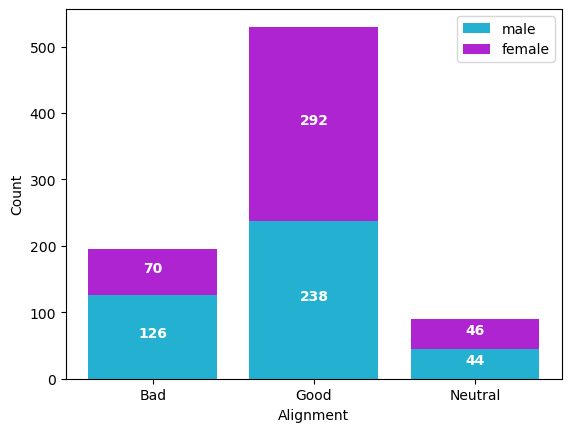

In [68]:
# Alignment by Gender

feature = pd.DataFrame(eda.pivot_table(index = ['gender', 'alignment'], aggfunc='size')).reset_index()
feature.columns = ['gender', 'alignment', 'count']
x = feature.alignment.unique()

fig, ax = plt.subplots()

# Stack bar graphs
ax.bar(x, feature['count'][feature['gender'] == 0], color='#24b1d1', label = "male")
ax.bar(x, feature['count'][feature['gender'] == 1], 
        bottom=feature['count'][feature['gender'] == 0], color='#ae24d1', label = "female")

# Number of counts
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)
    
# Labels
ax.legend()
ax.set_xlabel("Alignment")
ax.set_ylabel("Count")
plt.savefig('alignment.png')

Text(0, 0.5, 'Count')

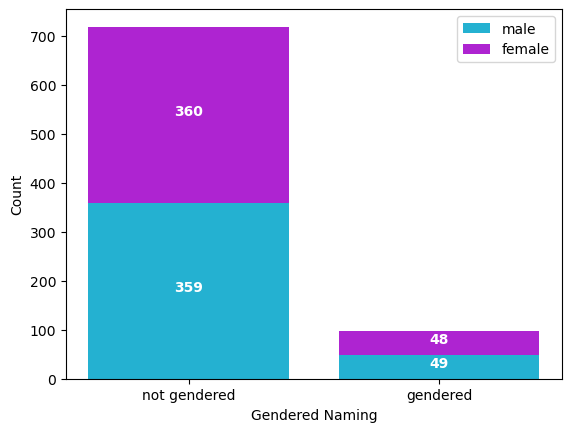

In [69]:
# Gendered Naming

feature = pd.DataFrame(eda.pivot_table(index = ['gender', 'gendered'], aggfunc='size')).reset_index()
feature.columns = ['gender', 'gendered', 'count']
x = ['not gendered', 'gendered']

fig, ax = plt.subplots()

# Stack bar graphs
ax.bar(x, feature['count'][feature['gender'] == 0], color='#24b1d1', label = "male")
ax.bar(x, feature['count'][feature['gender'] == 1], 
        bottom=feature['count'][feature['gender'] == 0], color='#ae24d1', label = "female")

# Count observations
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)
# Labels
ax.legend()
ax.set_xlabel("Gendered Naming")
ax.set_ylabel("Count")

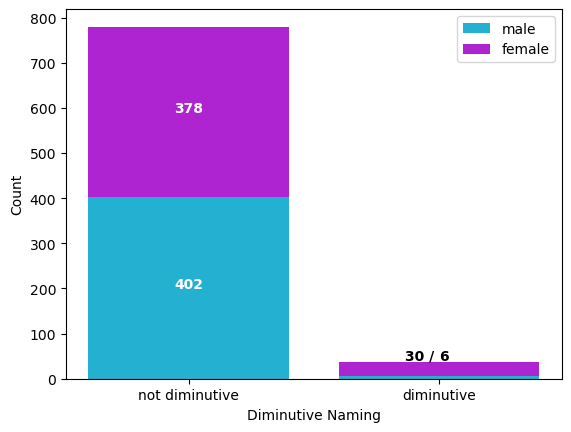

In [70]:
# Diminutive Naming

feature = pd.DataFrame(eda.pivot_table(index = ['gender', 'diminutive'], aggfunc='size')).reset_index()
feature.columns = ['gender', 'diminutive', 'count']
x = ['not diminutive', 'diminutive']

fig, ax = plt.subplots()

# Stack bar graphs
ax.bar(x, feature['count'][feature['gender'] == 0], color='#24b1d1', label = "male")
ax.bar(x, feature['count'][feature['gender'] == 1], 
        bottom=feature['count'][feature['gender'] == 0], color='#ae24d1', label = "female")


# Count observations
i,h,w = 1, 0, 0
for bar in ax.patches:
  if (i == 2):
    ax.text(bar.get_x() + bar.get_width() / 2,
          (bar.get_height() + bar.get_y()) * 2 + 30,
          round(bar.get_height()), ha = 'left',
          color = 'black', weight = 'bold', size = 10)
    h = (bar.get_height() + bar.get_y()) * 2 + 30
    w = bar.get_x() + bar.get_width() / 2 
  elif (i == 4):
    ax.text(bar.get_x() + bar.get_width() / 2,
          h,
          "{} / ".format(round(bar.get_height())), ha = 'right',
          color = 'black', weight = 'bold', size = 10)
  else: 
    ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)
  i = i + 1

# Labels
ax.legend()
ax.set_xlabel("Diminutive Naming")
ax.set_ylabel("Count")
plt.savefig('diminutive.png')

Text(0, 0.5, 'Count')

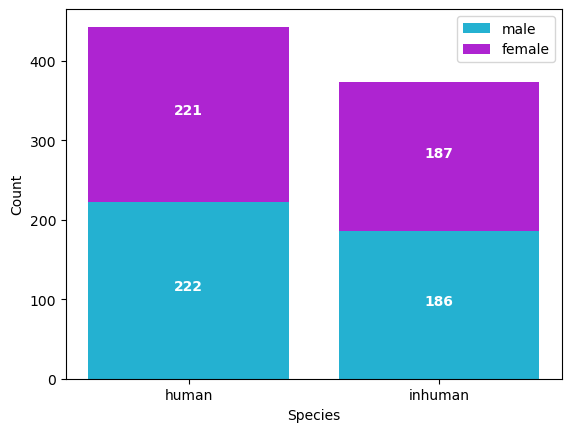

In [71]:
# Species by Gender

feature = pd.DataFrame(eda.pivot_table(index = ['gender', 'type_race'], aggfunc='size')).reset_index()
feature.columns = ['gender', 'race', 'count']
x = feature.race.unique()

fig, ax = plt.subplots()

# Stack bar graph
ax.bar(x, feature['count'][feature['gender'] == 0], color='#24b1d1', label = "male")
ax.bar(x, feature['count'][feature['gender'] == 1], 
        bottom=feature['count'][feature['gender'] == 0], color='#ae24d1', label = "female")

# Count observations
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)

# Labels
ax.legend()
ax.set_xlabel("Species")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

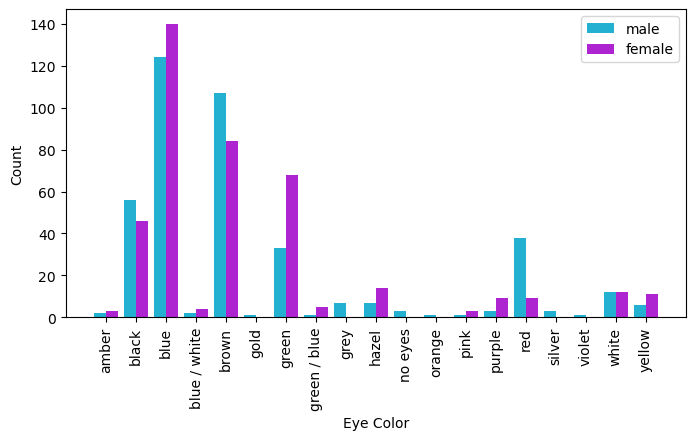

In [72]:
# Eye Color by Gender

feature = pd.DataFrame(eda.pivot_table(index = ['gender', 'eye_color'], aggfunc='size')).reset_index()
feature.columns = ['gender', 'color', 'count']

# male characters may not have some female eye colors and vice versa
set1 = set(feature[feature['gender'] == 0].color.unique())
set2 = set(feature[feature['gender'] == 1].color.unique())
colors = list(feature[feature['gender'] == 1].color.unique()) + list(set1 - set2)

for c in colors:
    if c not in feature[feature['gender'] == 0].color.unique():
        df = pd.DataFrame([[0,c,0]], columns=['gender','color','count'])
        feature = pd.concat([feature,df], ignore_index = True)
    if c not in feature[feature['gender'] == 1].color.unique():
        df = pd.DataFrame([[1,c,0]], columns=['gender','color','count'])
        feature = pd.concat([feature,df], ignore_index = True)

feature = feature.sort_values(by=['gender', 'color'])
feature = feature.reset_index(drop=True)
colors = feature['color'][0:int(len(feature)/2)]

fig, ax = plt.subplots(figsize=(8, 4))
X_axis = np.arange(len(colors))

# side by side bar graph
ax.bar(X_axis - 0.2, feature['count'][feature['gender'] == 0], 
       0.4, color='#24b1d1', label = "male")
ax.bar(X_axis + 0.2, feature['count'][feature['gender'] == 1], 
      0.4, color='#ae24d1', label = "female")

# Labels
ax.legend()
plt.xticks(X_axis, colors) 
plt.xticks(rotation=90)
ax.set_xlabel("Eye Color")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

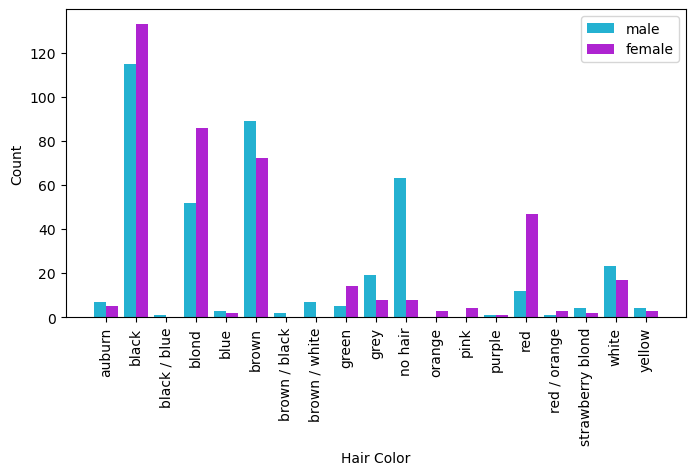

In [73]:
# Hair Colot by Gender

feature = pd.DataFrame(eda.pivot_table(index = ['gender', 'hair_color'], aggfunc='size')).reset_index()
feature.columns = ['gender', 'color', 'count']

# male characters may not have some female hair colors and vice versa
set1 = set(feature[feature['gender'] == 0].color.unique())
set2 = set(feature[feature['gender'] == 1].color.unique())
colors = list(feature[feature['gender'] == 1].color.unique()) + list(set1 - set2)

for c in colors:
    if c not in feature[feature['gender'] == 0].color.unique():
        df = pd.DataFrame([[0,c,0]], columns=['gender','color','count'])
        feature = pd.concat([feature,df], ignore_index = True)
    if c not in feature[feature['gender'] == 1].color.unique():
        df = pd.DataFrame([[1,c,0]], columns=['gender','color','count'])
        feature = pd.concat([feature,df], ignore_index = True)

feature = feature.sort_values(by=['gender', 'color'])
feature = feature.reset_index(drop=True)
colors = feature['color'][0:int(len(feature)/2)]

fig, ax = plt.subplots(figsize=(8, 4))
X_axis = np.arange(len(colors))

# side by side bar graph
ax.bar(X_axis - 0.2, feature['count'][feature['gender'] == 0], 
       0.4, color='#24b1d1', label = "male")
ax.bar(X_axis + 0.2, feature['count'][feature['gender'] == 1], 
      0.4, color='#ae24d1', label = "female")

# Labels
ax.legend()
plt.xticks(X_axis, colors) 
plt.xticks(rotation=90)
ax.set_xlabel("Hair Color")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

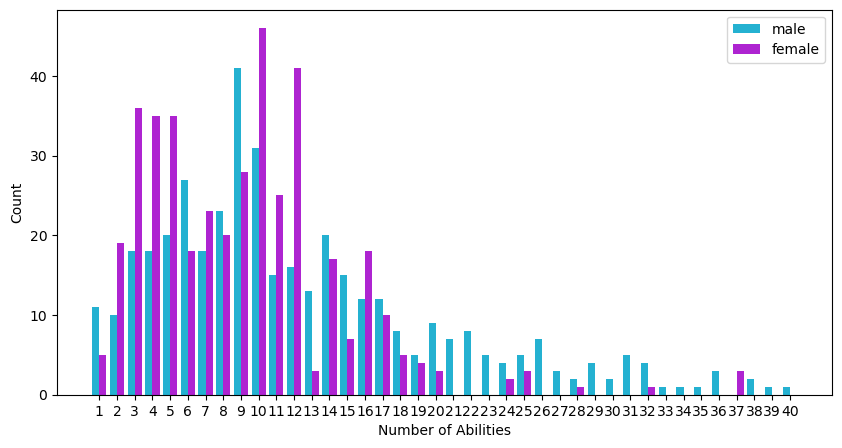

In [74]:
# Number of Abilities by Gender

eda = eda.astype({'num_abilities':'int'})

feature = pd.DataFrame(eda.pivot_table(index = ['gender', 'num_abilities'], aggfunc='size')).reset_index()
feature.columns = ['gender', 'number', 'count']

# account for female and male specific abilities
set1 = set(feature[feature['gender'] == 0].number.unique())
set2 = set(feature[feature['gender'] == 1].number.unique())
colors = list(feature[feature['gender'] == 1].number.unique()) + list(set1 - set2)

for c in colors:
    if c not in feature[feature['gender'] == 0].number.unique():
        df = pd.DataFrame([[0,c,0]], columns=['gender','number','count'])
        feature = pd.concat([feature,df], ignore_index = True)
    if c not in feature[feature['gender'] == 1].number.unique():
        df = pd.DataFrame([[1,c,0]], columns=['gender','number','count'])
        feature = pd.concat([feature,df], ignore_index = True)

feature = feature.sort_values(by=['gender', 'number'])
feature = feature.reset_index(drop=True)
colors = feature['number'][0:int(len(feature)/2)]


fig, ax = plt.subplots(figsize=(10, 5))

X_axis = np.arange(len(colors))

# side by side bar graphs
ax.bar(X_axis - 0.2, feature['count'][feature['gender'] == 0], 
       0.4, color='#24b1d1', label = "male")
ax.bar(X_axis + 0.2, feature['count'][feature['gender'] == 1], 
      0.4, color='#ae24d1', label = "female")

# Labels
ax.legend()
plt.xticks(X_axis, colors) 
ax.set_xlabel("Number of Abilities")
ax.set_ylabel("Count")

In [75]:
eda.groupby(['gender'])['num_abilities'].mean()

gender
0    12.392157
1     9.151961
Name: num_abilities, dtype: float64

In [76]:
print("# males with more than 20 abilities: {}".format
      (eda[eda['num_abilities'] > 20][eda['gender'] == 0].shape[0]))
print("# females with more than 20 abilities: {}".format
      (eda[eda['num_abilities'] > 20][eda['gender'] == 1].shape[0]))

# males with more than 20 abilities: 66
# females with more than 20 abilities: 10


### 2.2 Numerical Features

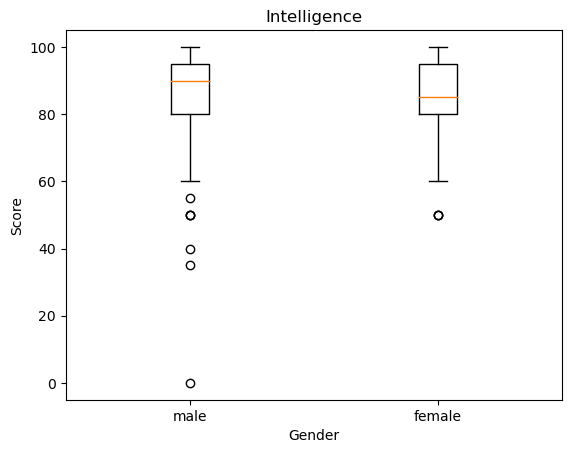

In [77]:
plt.ylim(-5,105)
plt.boxplot([eda['intelligence_score'][eda['gender'] == 0],
        eda['intelligence_score'][eda['gender'] == 1]],
           labels = ['male', 'female'])
plt.title('Intelligence')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.savefig('intel.png')
plt.show()

In [78]:
eda.groupby('gender')['intelligence_score'].median()

gender
0    90.0
1    85.0
Name: intelligence_score, dtype: float64

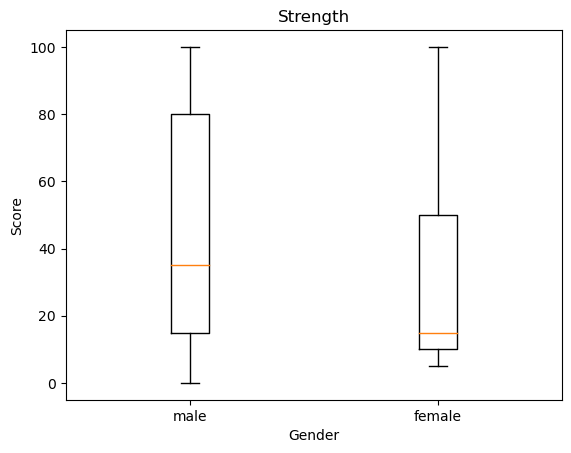

In [79]:
plt.ylim(-5,105)
plt.boxplot([eda['strength_score'][eda['gender'] == 0],
        eda['strength_score'][eda['gender'] == 1]],
           labels = ['male', 'female'])
plt.title('Strength')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.savefig('strength.png')
plt.show()

In [80]:
eda.groupby('gender')['strength_score'].median()

gender
0    35.0
1    15.0
Name: strength_score, dtype: float64

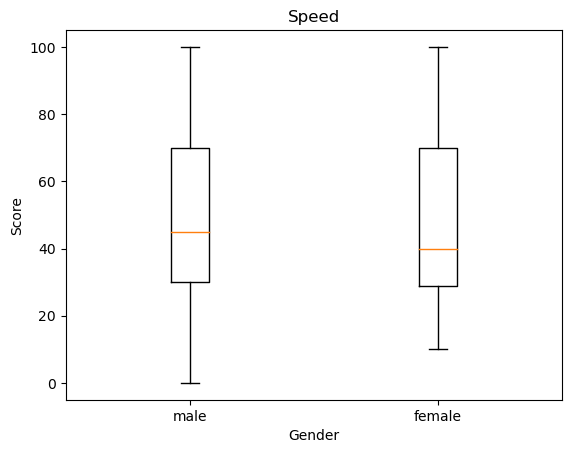

In [81]:
plt.ylim(-5,105)
plt.boxplot([eda['speed_score'][eda['gender'] == 0],
        eda['speed_score'][eda['gender'] == 1]],
           labels = ['male', 'female'])
plt.title('Speed')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.savefig('speed.png')
plt.show()

In [82]:
eda.groupby('gender')['speed_score'].median()

gender
0    45.0
1    40.0
Name: speed_score, dtype: float64

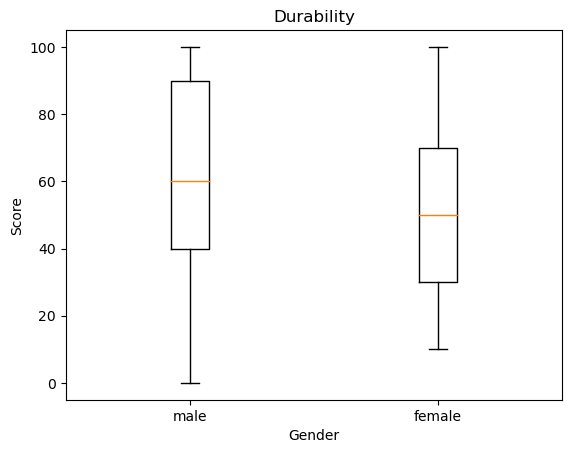

In [83]:
plt.ylim(-5,105)
plt.boxplot([eda['durability_score'][eda['gender'] == 0],
        eda['durability_score'][eda['gender'] == 1]],
           labels = ['male', 'female'])
plt.title('Durability')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.savefig('durability.png')
plt.show()

In [84]:
eda.groupby('gender')['durability_score'].median()

gender
0    60.0
1    50.0
Name: durability_score, dtype: float64

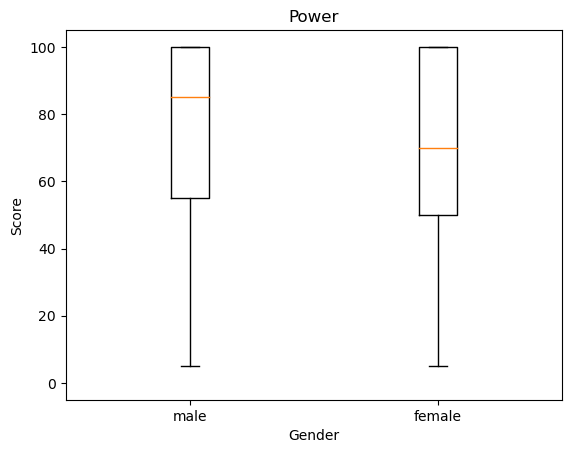

In [85]:
plt.ylim(-5,105)
plt.boxplot([eda['power_score'][eda['gender'] == 0],
        eda['power_score'][eda['gender'] == 1]],
           labels = ['male', 'female'])
plt.title('Power')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.savefig('power.png')
plt.show()

In [86]:
eda.groupby('gender')['power_score'].median()

gender
0    85.0
1    70.0
Name: power_score, dtype: float64

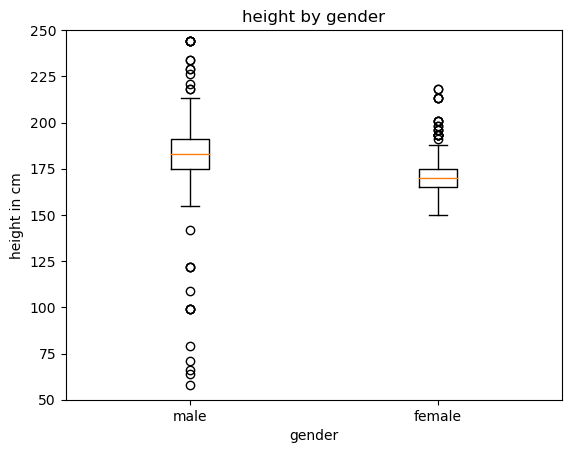

In [87]:
plt.ylim(50,250)
plt.boxplot([eda['height'][eda['gender'] == 0],
        eda['height'][eda['gender'] == 1]],
           labels = ['male', 'female'])

plt.title('height by gender')
plt.xlabel('gender')
plt.ylabel('height in cm')
plt.savefig('height.png')
plt.show()

In [88]:
print('tallest male:', eda['height'][eda['gender'] == 0].max(), 'cm')
print('tallest female:', eda['height'][eda['gender'] == 1].max(), 'cm')
print('shortest male:', eda['height'][eda['gender'] == 0].min(), 'cm')
print('shortest female:', eda['height'][eda['gender'] == 1].min(), 'cm')
print('median height male:', eda['height'][eda['gender'] == 0].median(), 'cm')
print('median height female:', eda['height'][eda['gender'] == 1].median(), 'cm')

tallest male: 7000 cm
tallest female: 1400 cm
shortest male: 3 cm
shortest female: 3 cm
median height male: 183.0 cm
median height female: 170.0 cm


In [89]:
eda.groupby('gender')['height'].std()

gender
0    352.444243
1     87.775547
Name: height, dtype: float64

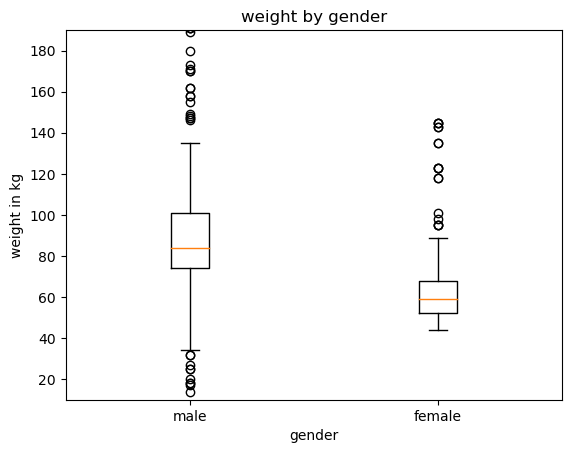

In [90]:
plt.ylim(10, 190)
plt.boxplot([eda['weight'][eda['gender'] == 0],
        eda['weight'][eda['gender'] == 1]],
           labels = ['male', 'female'])
plt.title('weight by gender')
plt.xlabel('gender')
plt.ylabel('weight in kg')
plt.savefig('weight.png')
plt.show()

In [91]:
print('heaviest male:', eda['weight'][eda['gender'] == 0].max(), 'kg')
print('heaviest female:', eda['weight'][eda['gender'] == 1].max(), 'kg')
print('lightest male:', eda['weight'][eda['gender'] == 0].min(), 'kg')
print('lightest female:', eda['weight'][eda['gender'] == 1].min(), 'kg')
print('median weight male:', eda['weight'][eda['gender'] == 0].median(), 'kg')
print('median weight female:', eda['weight'][eda['gender'] == 1].median(), 'kg')

heaviest male: 99208000 kg
heaviest female: 496000 kg
lightest male: 3 kg
lightest female: 44 kg
median weight male: 84.0 kg
median weight female: 59.0 kg


In [92]:
eda.groupby('gender')['weight'].std()

gender
0    4.911514e+06
1    2.455223e+04
Name: weight, dtype: float64

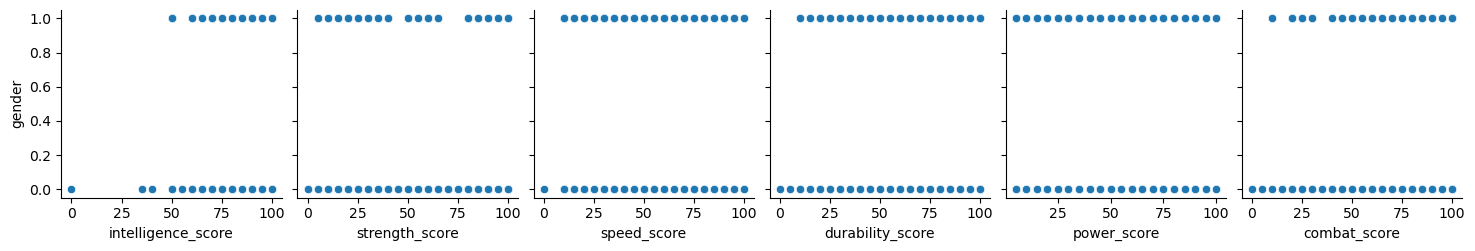

In [93]:
sns.pairplot(eda[['gender'] + numerical], x_vars = numerical[:6], y_vars = ['gender'])

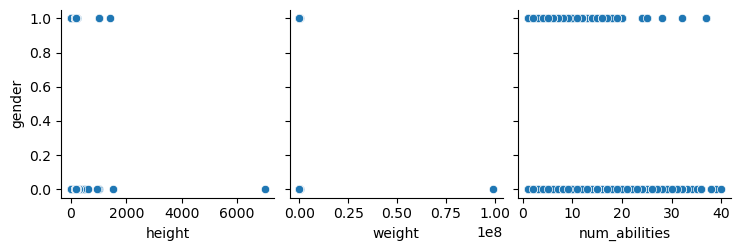

In [94]:
sns.pairplot(eda[['gender'] + numerical], x_vars = numerical[6:], y_vars = ['gender'])

### 2.3 Ability Features

In [95]:
has_ability = eda[ability].astype(int)
has_ability.insert(0, 'gender', eda['gender'])

<Axes: >

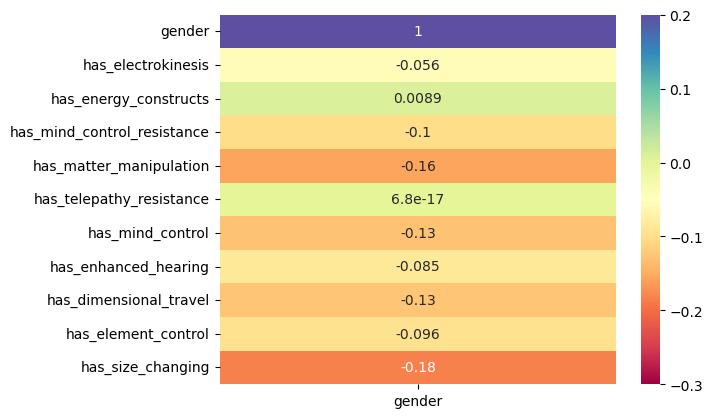

In [96]:
# compute the correlation between select variables and show heatmap
begin = 1
num =  10
var = list(range(1,begin + num)) 
var = [0] + var
corr = has_ability.iloc[:,var].corr()
sns.heatmap(corr[['gender']], vmax = 0.2, vmin = -0.3, annot = True, cmap = 'Spectral', annot_kws={"size": 10})

<Axes: >

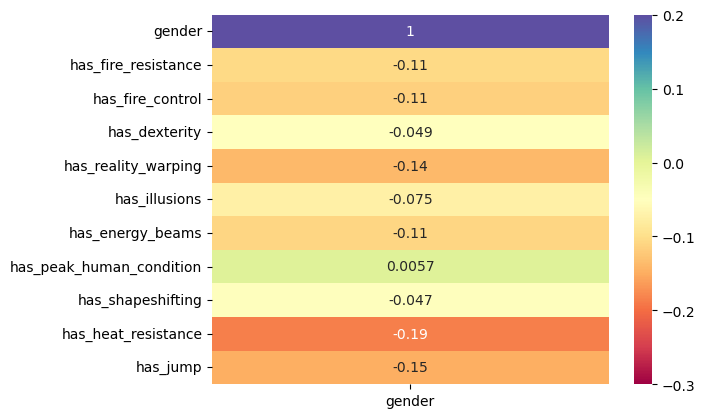

In [97]:
# compute the correlation between select variables and show heatmap
begin = begin + num
var = list(range(begin,begin + num)) 
var = [0] + var
corr = has_ability.iloc[:,var].corr()
sns.heatmap(corr[['gender']], vmax = 0.2, vmin = -0.3, annot = True, cmap = 'Spectral', annot_kws={"size": 10})

<Axes: >

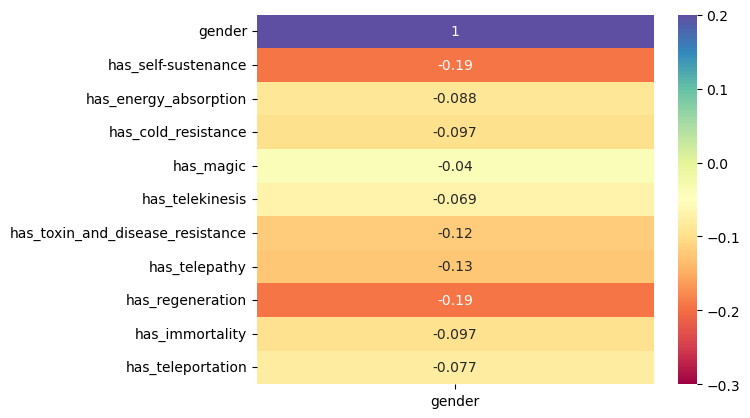

In [98]:
# compute the correlation between select variables and show heatmap
begin = begin + num
var = list(range(begin,begin + num)) 
var = [0] + var
corr = has_ability.iloc[:,var].corr()
sns.heatmap(corr[['gender']], vmax = 0.2, vmin = -0.3, annot = True, cmap = 'Spectral', annot_kws={"size": 10})

<Axes: >

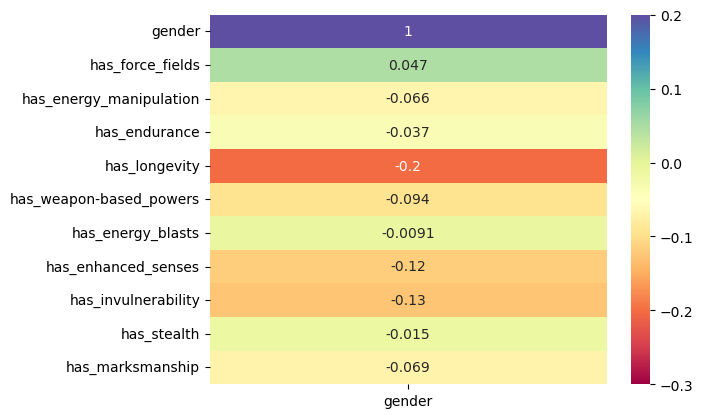

In [99]:
# compute the correlation between select variables and show heatmap
begin = begin + num
var = list(range(begin,begin + num)) 
var = [0] + var
corr = has_ability.iloc[:,var].corr()
sns.heatmap(corr[['gender']], vmax = 0.2, vmin = -0.3, annot = True, cmap = 'Spectral', annot_kws={"size": 10})

<Axes: >

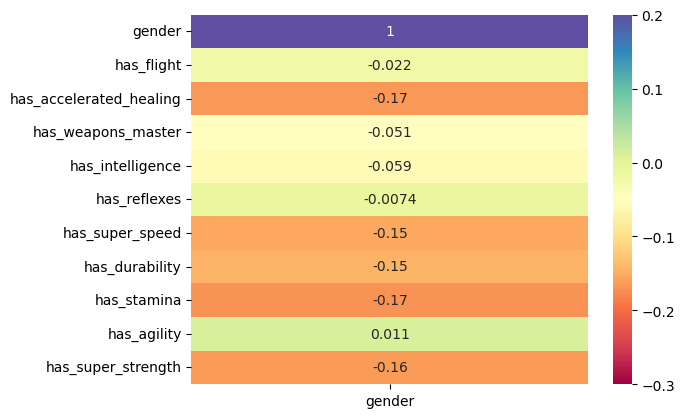

In [100]:
# compute the correlation between select variables and show heatmap
begin = begin + num
var = list(range(begin,begin + num)) 
var = [0] + var
corr = has_ability.iloc[:,var].corr()
sns.heatmap(corr[['gender']], vmax = 0.2, vmin = -0.3, annot = True, cmap = 'Spectral', annot_kws={"size": 10})

In [101]:
# top10 has_ability features in terms of correlation magnitude
names = has_ability.corr()['gender'].abs().nlargest(11).index
print(has_ability[names].corr()['gender'])

gender                     1.000000
has_longevity             -0.202234
has_self-sustenance       -0.193574
has_regeneration          -0.192688
has_heat_resistance       -0.186655
has_size_changing         -0.184478
has_stamina               -0.171073
has_accelerated_healing   -0.165868
has_super_strength        -0.164434
has_matter_manipulation   -0.155496
has_super_speed           -0.153923
Name: gender, dtype: float64


## Section 3: Analysis

### 3.1 Feature Selection and Hyperparameter Tuning

In [102]:
# for a model with n feature inputs
# return n features and that maximizes performance and the score
def feature_selection(model, n):
    sfs = SequentialFeatureSelector(model, scoring = 'balanced_accuracy', n_features_to_select=n)
    sfs.fit(train_x, train_y)
    features = train_x.columns[sfs.get_support()].tolist()
    model.fit(train_x[features], train_y)
    y_pred = model.predict(train_x[features])
    
    return train_x.columns[sfs.get_support()].tolist(), balanced_accuracy_score(train_y, y_pred)

In [103]:
# plot bar graph of feature importance 
# using the  permutation importance function
def plot_features(model, features_selected, name, rotate):
    
    result = permutation_importance(
        model, train_x[features_selected], train_y, n_repeats=10, random_state=42, 
        scoring = 'balanced_accuracy')

    importances = pd.Series(result.importances_mean, index=features_selected)

    fig, ax = plt.subplots()
    importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importance: {}".format(name))
    ax.set_ylabel("mean balanced accuracy decrease")
    fig.tight_layout()
    # depending on label length, rotate 
    if (rotate):
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)
    #plt.savefig('.png')
    plt.show()

 # <font size="4.4">3.1.1 Nearest Neighbors  </font>

In [104]:
k_opt = 0 #k value
knn_num = 0 #number of features
knn_select = [] #features
knn_score = 0 #max f1 score

# find the optimal k value
for k in range(2, int(np.sqrt(len(train_x))) + 1):
    knn = KNeighborsClassifier(n_neighbors= k)
    score_max = 0
    k_num = 0
    k_select = []
    k_temp = []
    
    # consider feature input sizes of up to 10
    for num in range(1, 11):
        k_temp, score = feature_selection(knn, num)
        # attempt to prevent overfitting
        if (score > 0.95):
            continue
        # if the score increases,
        # each additional feature added must on average increase by threshold
        if (score - score_max > 0.01 * (num - k_num)):
                k_num = num
                score_max = score
                k_select = k_temp

    if (score_max > knn_score):
        k_opt = k
        knn_num = k_num
        knn_score = score_max
        knn_select = k_select

print('best balanced accuracy score: {}'.format(knn_score))
print('optimal parameters: k = {}'.format(k_opt))
print('optimal number of features: {}'.format(knn_num))
print('features: {}'.format(knn_select))

best balanced accuracy score: 0.9240196078431373
optimal parameters: k = 2
optimal number of features: 2
features: ['weight', 'num_abilities']


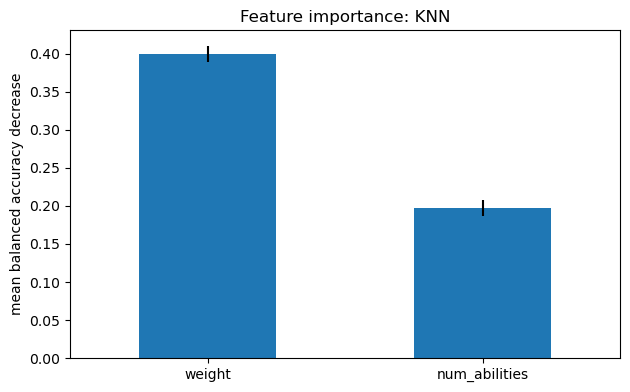

In [105]:
knn = KNeighborsClassifier(n_neighbors= k_opt)
knn.fit(train_x[knn_select], train_y)

plot_features(knn, knn_select, "KNN", False)

 # <font size="4.4">3.1.2 Naive Bayes </font>

In [106]:
nbayes = GaussianNB()

nb_score = 0
nb_num = 0
nb_select = []

# consider feature input sizes of up to 10
for num in range(1, 11):
    nb_temp, score = feature_selection(nbayes, num)
    if (score > 0.95):
        continue
    if (score - nb_score > 0.01 * (num - nb_num)):
        nb_num = num
        nb_select = nb_temp
        nb_score = score

print('best balanced accuracy score: {}'.format(nb_score))
print('optimal number of features: {}'.format(nb_num))
print('features: {}'.format(nb_select))

best balanced accuracy score: 0.6887254901960784
optimal number of features: 6
features: ['alignment_Bad', 'strength_score', 'combat_score', 'eye_color_green', 'eye_color_yellow', 'num_abilities']


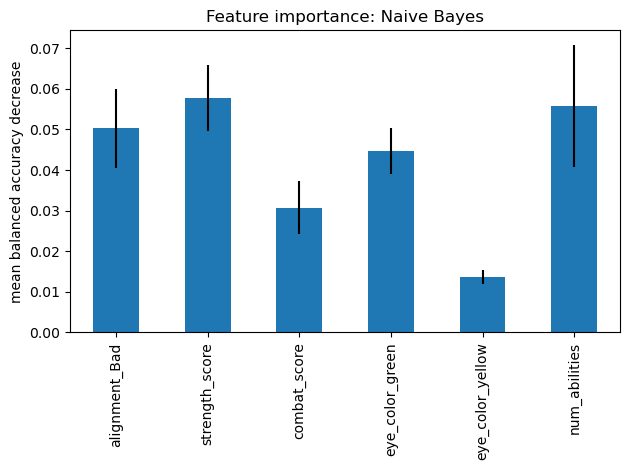

In [107]:
nbayes = GaussianNB()
nbayes.fit(train_x[nb_select], train_y)

plot_features(nbayes, nb_select, "Naive Bayes", True)

 # <font size="4.4">3.1.3 Logistic Regression  </font>

In [108]:
log_num = 0
log_select = []
log_score = 0
log_c = 0
log_solver = ''


for s in ['lbfgs', 'liblinear']:
    for c in [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]:
        lreg = LogisticRegression(C = c, solver = s, max_iter = 1000)
        score_max = 0
        l_num = 0
        l_select = []
        l_temp = []
        
        # consider feature input sizes of up to 10
        for num in range(1, 11):
            l_temp, score = feature_selection(lreg, num)
            
            if (score > 0.95):
                continue
            if (score - score_max > 0.01 * (num - l_num)):
                score_max = score
                l_num = num
                l_select = l_temp

        if (score_max > log_score):
            log_num = l_num
            log_score = score_max
            log_select = l_select
            log_c = c
            log_solver = s

print('best balanced accuracy score: {}'.format(log_score))
print('optimal parameters: C = {}, solver = {}'.format(log_c, log_solver))
print('optimal number of features: {}'.format(log_num))
print('features: {}'.format(log_select))

best balanced accuracy score: 0.7561274509803921
optimal parameters: C = 1, solver = lbfgs
optimal number of features: 2
features: ['height', 'hair_color_orange']


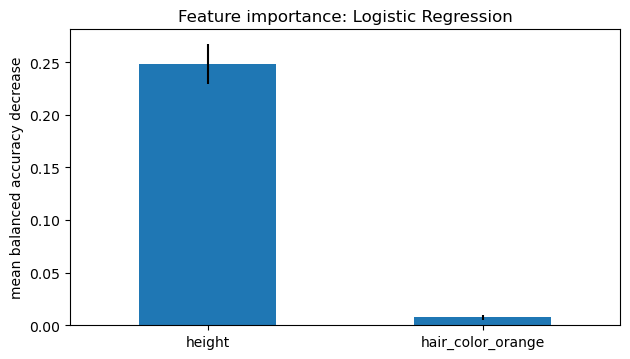

In [109]:
lreg = LogisticRegression(C = log_c, solver = log_solver)
lreg.fit(train_x[log_select], train_y)

plot_features(lreg, log_select, "Logistic Regression", False)

 # <font size="4.4">3.1.4 Support-Vector Classification  </font>

In [110]:
# different parameter values 
param_grid = {'kernel': ['rbf','sigmoid'], 'gamma': [0.01, 0.05, 0.1, 0.5],
              'C': [0.1, 1, 10]}

# Find the best parameter
grid = GridSearchCV(SVC(random_state = 3, probability = True), param_grid=param_grid, 
                    scoring = 'balanced_accuracy', return_train_score=True)

# fit on all features of the training data
grid.fit(train_x, train_y)

print(f"best mean cross-validation score: {grid.best_score_}")
print(f"best parameters: {grid.best_params_}")

best mean cross-validation score: 0.9609605540499849
best parameters: {'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}


In [111]:
# optimal parameter values
c_opt = grid.best_params_.get('C')
gamma_opt = grid.best_params_.get('gamma')
k = grid.best_params_.get('kernel')

In [112]:
svc = SVC(C = c_opt, gamma = gamma_opt, kernel = k, random_state = 3, probability = True)

svc_score = 0
svc_num = 0
svc_select = []

for num in range(1, 11):
    svc_temp, score = feature_selection(svc, num)
    if (score > 0.95):
        continue
    if (score - svc_score > 0.01 * (num - svc_num)):
        svc_num = num
        svc_select = svc_temp
        svc_score = score


print('best balanced accuracy score: {}'.format(svc_score))
print(f"optimal parameters: {grid.best_params_}")
print('optimal number of features: {}'.format(svc_num))
print('features: {}'.format(svc_select))

best balanced accuracy score: 0.9240196078431373
optimal parameters: {'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}
optimal number of features: 2
features: ['speed_score', 'weight']


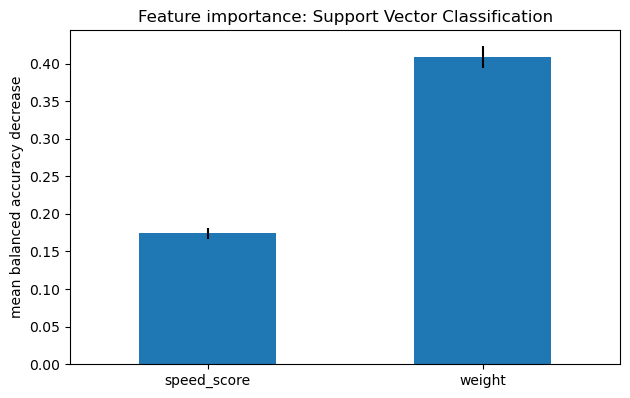

In [113]:
svc = SVC(C = c_opt, gamma = gamma_opt, kernel = k,
          random_state = 3, probability =  True)
svc.fit(train_x[svc_select], train_y,)
plot_features(svc, svc_select, "Support Vector Classification", False)

 # <font size="4.4">3.1.5 Decision Tree  </font>

In [114]:
param_grid = {'max_depth': [4,5,6], 'min_samples_split': [15,20,25], 
              'min_samples_leaf': [10, 15, 20], 'criterion': ['gini', 'entropy', 'log_loss']}

grid = GridSearchCV(DTree(random_state = 3), param_grid=param_grid, 
                    scoring = 'balanced_accuracy', return_train_score=True)

grid.fit(train_x, train_y)

print(f"best mean cross-validation score: {grid.best_score_}")
print(f"best parameters: {grid.best_params_}")

best mean cross-validation score: 0.826242095754291
best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 15}


In [115]:
c = grid.best_params_.get('criterion')
d = grid.best_params_.get('max_depth')
l = grid.best_params_.get('min_samples_leaf')
s = grid.best_params_.get('min_samples_split')

In [116]:
tree = DTree(criterion = c, max_depth = d, min_samples_leaf = l, min_samples_split = s,
            random_state = 3)

tree_score = 0
tree_num = 0
tree_select = []

for num in range(1, 11):
    tree_temp, score = feature_selection(tree, num)
    if (score > 0.95):
        continue
    if (score - tree_score > 0.01 * (num - tree_num)):
        tree_num = num
        tree_select = tree_temp
        tree_score = score


print('best balanced accuracy score: {}'.format(tree_score))
print(f"optimal parameters: {grid.best_params_}")
print('optimal number of features: {}'.format(tree_num))
print('features: {}'.format(tree_select))

best balanced accuracy score: 0.8553921568627452
optimal parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 15}
optimal number of features: 2
features: ['power_score', 'weight']


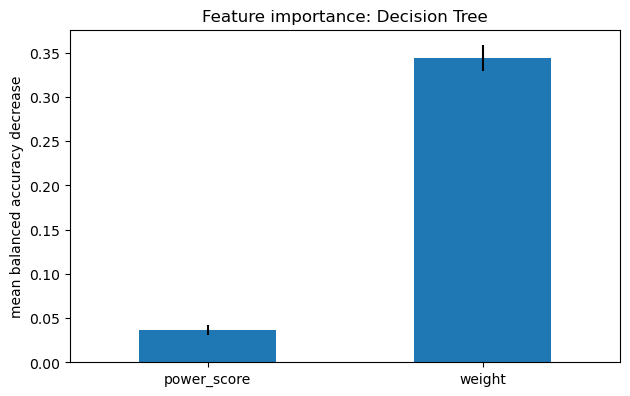

In [117]:
decision = DTree(criterion = c, max_depth = d, min_samples_leaf = l, 
             min_samples_split = s, random_state = 3)
decision.fit(train_x[tree_select], train_y)
plot_features(decision, tree_select, "Decision Tree", False)

 # <font size="4.4">3.1.6 Random Forest  </font>

In [118]:
param_grid = {'n_estimators': [30, 60, 90], 'max_depth': [4,5,6], 'min_samples_split': [15,20,25], 
              'min_samples_leaf': [10, 15, 20], 'criterion': ['gini', 'entropy', 'log_loss']}

grid = GridSearchCV(RForest(random_state = 3), param_grid=param_grid, 
                    scoring = 'balanced_accuracy', return_train_score=True)

grid.fit(train_x, train_y)

print(f"best mean cross-validation score: {grid.best_score_}")
print(f"best parameters: {grid.best_params_}")

best mean cross-validation score: 0.8530864197530864
best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 30}


In [119]:
n = grid.best_params_.get('n_estimators')
c = grid.best_params_.get('criterion')
d = grid.best_params_.get('max_depth')
l = grid.best_params_.get('min_samples_leaf')
s = grid.best_params_.get('min_samples_split')

In [120]:
forest = RForest(n_estimators = n, criterion = c, max_depth = d, 
                 min_samples_leaf = l, min_samples_split = s,
                 random_state = 3)

forest_score = 0
forest_num = 0
forest_select = []

for num in range(1, 11):
    forest_temp, score = feature_selection(forest, num)
    if (score > 0.95):
        continue
    if (score - forest_score > 0.01 * (num - forest_num)):
        forest_num = num
        forest_select = forest_temp
        forest_score = score


print('best balanced accuracy score: {}'.format(forest_score))
print(f"optimal parameters: {grid.best_params_}")
print('optimal number of features: {}'.format(forest_num))
print('features: {}'.format(forest_select))

best balanced accuracy score: 0.8566176470588236
optimal parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 30}
optimal number of features: 2
features: ['weight', 'has_super_strength']


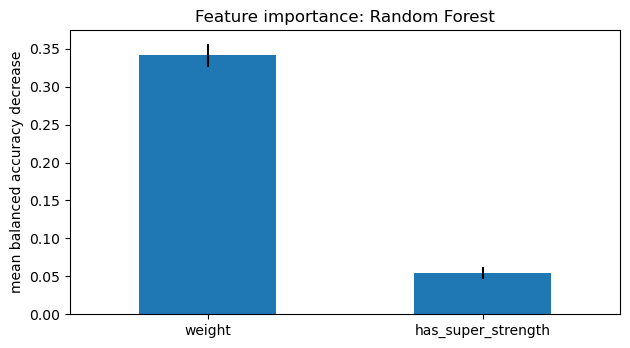

In [121]:
forest = RForest(n_estimators = n, criterion = c, max_depth = d, min_samples_leaf = l, 
             min_samples_split = s, random_state = 3)
forest.fit(train_x[forest_select], train_y)
plot_features(forest, forest_select, "Random Forest", False)

# <font size="4.2">3.1.7 Neural Networks</font>

In [122]:
layers = [(5,5), (5,5,5), (5,5,5,5), (5,5,5,5,5)]

param_grid = {'solver': ['lbfgs', 'adam'], 'hidden_layer_sizes': layers, 
              'alpha': [0.1, 0.01, 0.001, 0.0001], 'activation': ['relu', 'tanh']}

grid = GridSearchCV(MLPClassifier(random_state = 3), param_grid=param_grid, 
                    scoring = 'balanced_accuracy', return_train_score=True)

grid.fit(train_x, train_y)

print(f"best mean cross-validation score: {grid.best_score_}")
print(f"best parameters: {grid.best_params_}")

best mean cross-validation score: 0.8395663956639566
best parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (5, 5, 5, 5), 'solver': 'adam'}


In [123]:
l = grid.best_params_.get('hidden_layer_sizes')
a = grid.best_params_.get('alpha')
act = grid.best_params_.get('activation')
s = grid.best_params_.get('solver')

In [124]:
neural = MLPClassifier(hidden_layer_sizes = l, solver = s,
                       alpha = a, activation = act,
                       random_state = 3)

n_score = 0
n_num = 0
n_select = []

for num in range(1, 11):
    n_temp, score = feature_selection(neural, num)
    if (score > 0.95):
        continue
    if (score - n_score > 0.01 * (num - n_num)):
        n_num = num
        n_select = n_temp
        n_score = score


print('best balanced accuracy score: {}'.format(n_score))
print(f"optimal parameters: {grid.best_params_}")
print('optimal number of features: {}'.format(n_num))
print('features: {}'.format(n_select))

best balanced accuracy score: 0.8321078431372548
optimal parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (5, 5, 5, 5), 'solver': 'adam'}
optimal number of features: 3
features: ['weight', 'type_race_inhuman', 'has_mind_control']


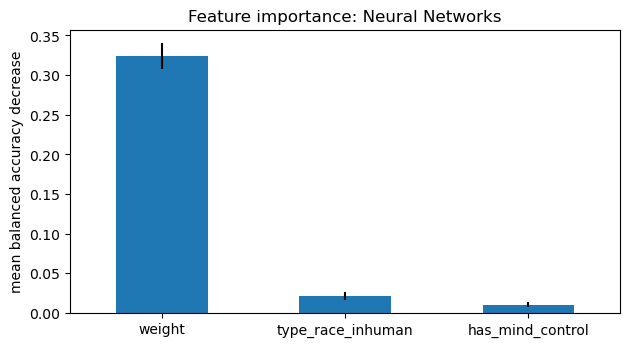

In [125]:
neural = MLPClassifier(hidden_layer_sizes = l, solver = s,
                       alpha = a, activation = act,
                       random_state = 3)
neural.fit(train_x[n_select], train_y)
plot_features(neural, n_select, "Neural Networks", False)

### 3.2 Model Performance on Training Set

In [126]:
# Plot confusion matrix
def plot_confusion(orig, pred, name):
    cm = confusion_matrix(orig, pred)
    # 0 is male and 1 is female
    disp = display(confusion_matrix=cm, display_labels=['male', 'female'])
    disp.plot()
    plt.title(name)
    #plt.savefig('image.png')
    plt.show()

In [127]:
# Print different metrics
def score_metrics(orig, pred):
    print("balanced accuracy: {}".format(balanced_accuracy_score(orig, pred)))
    print("accuracy: {}".format(accuracy_score(orig, pred)))
    print("precision: {}".format(precision_score(orig, pred)))
    print("recall: {}".format(recall_score(orig, pred)))
    print("f1: {}".format(f1_score(orig, pred)))

['weight', 'num_abilities']


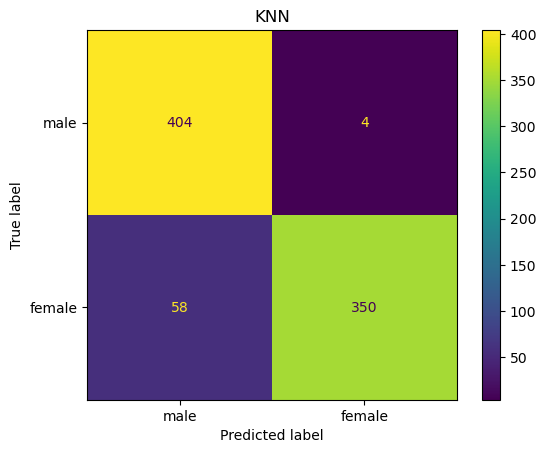

balanced accuracy: 0.9240196078431373
accuracy: 0.9240196078431373
precision: 0.9887005649717514
recall: 0.8578431372549019
f1: 0.9186351706036745


In [128]:
print(knn_select)
y_pred = knn.predict(train_x[knn_select])
plot_confusion(train_y, y_pred, "KNN")
score_metrics(train_y, y_pred)

['alignment_Bad', 'strength_score', 'combat_score', 'eye_color_green', 'eye_color_yellow', 'num_abilities']


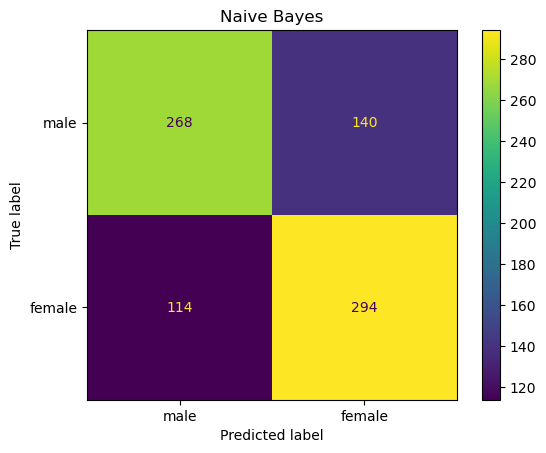

balanced accuracy: 0.6887254901960784
accuracy: 0.6887254901960784
precision: 0.6774193548387096
recall: 0.7205882352941176
f1: 0.6983372921615202


In [129]:
print(nb_select)
y_pred = nbayes.predict(train_x[nb_select])
plot_confusion(train_y, y_pred, "Naive Bayes")
score_metrics(train_y, y_pred)

['height', 'hair_color_orange']


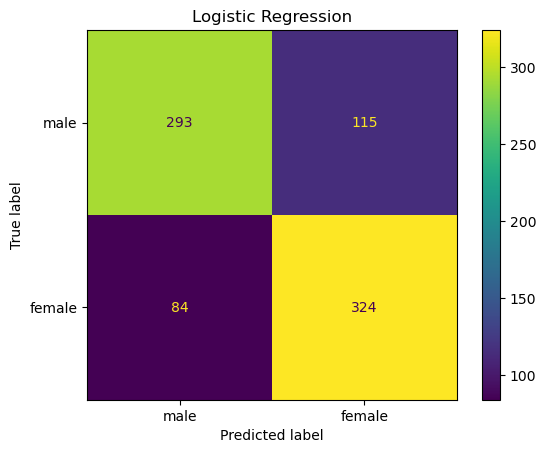

balanced accuracy: 0.7561274509803921
accuracy: 0.7561274509803921
precision: 0.7380410022779044
recall: 0.7941176470588235
f1: 0.7650531286894924


In [130]:
print(log_select)
y_pred = lreg.predict(train_x[log_select])
plot_confusion(train_y, y_pred, "Logistic Regression")
score_metrics(train_y, y_pred)

['speed_score', 'weight']


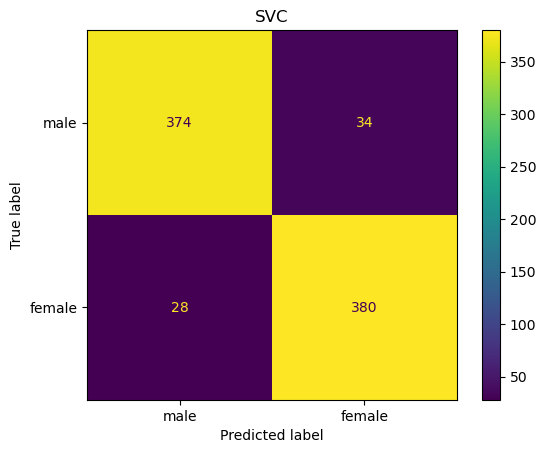

balanced accuracy: 0.9240196078431373
accuracy: 0.9240196078431373
precision: 0.9178743961352657
recall: 0.9313725490196079
f1: 0.9245742092457422


In [131]:
print(svc_select)
y_pred = svc.predict(train_x[svc_select])
plot_confusion(train_y, y_pred, "SVC")
score_metrics(train_y, y_pred)

['power_score', 'weight']


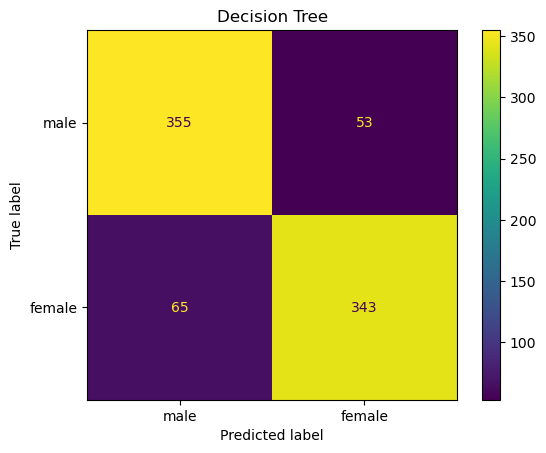

balanced accuracy: 0.8553921568627452
accuracy: 0.8553921568627451
precision: 0.8661616161616161
recall: 0.8406862745098039
f1: 0.8532338308457712


In [132]:
print(tree_select)
y_pred = decision.predict(train_x[tree_select])
plot_confusion(train_y, y_pred, "Decision Tree")
score_metrics(train_y, y_pred)

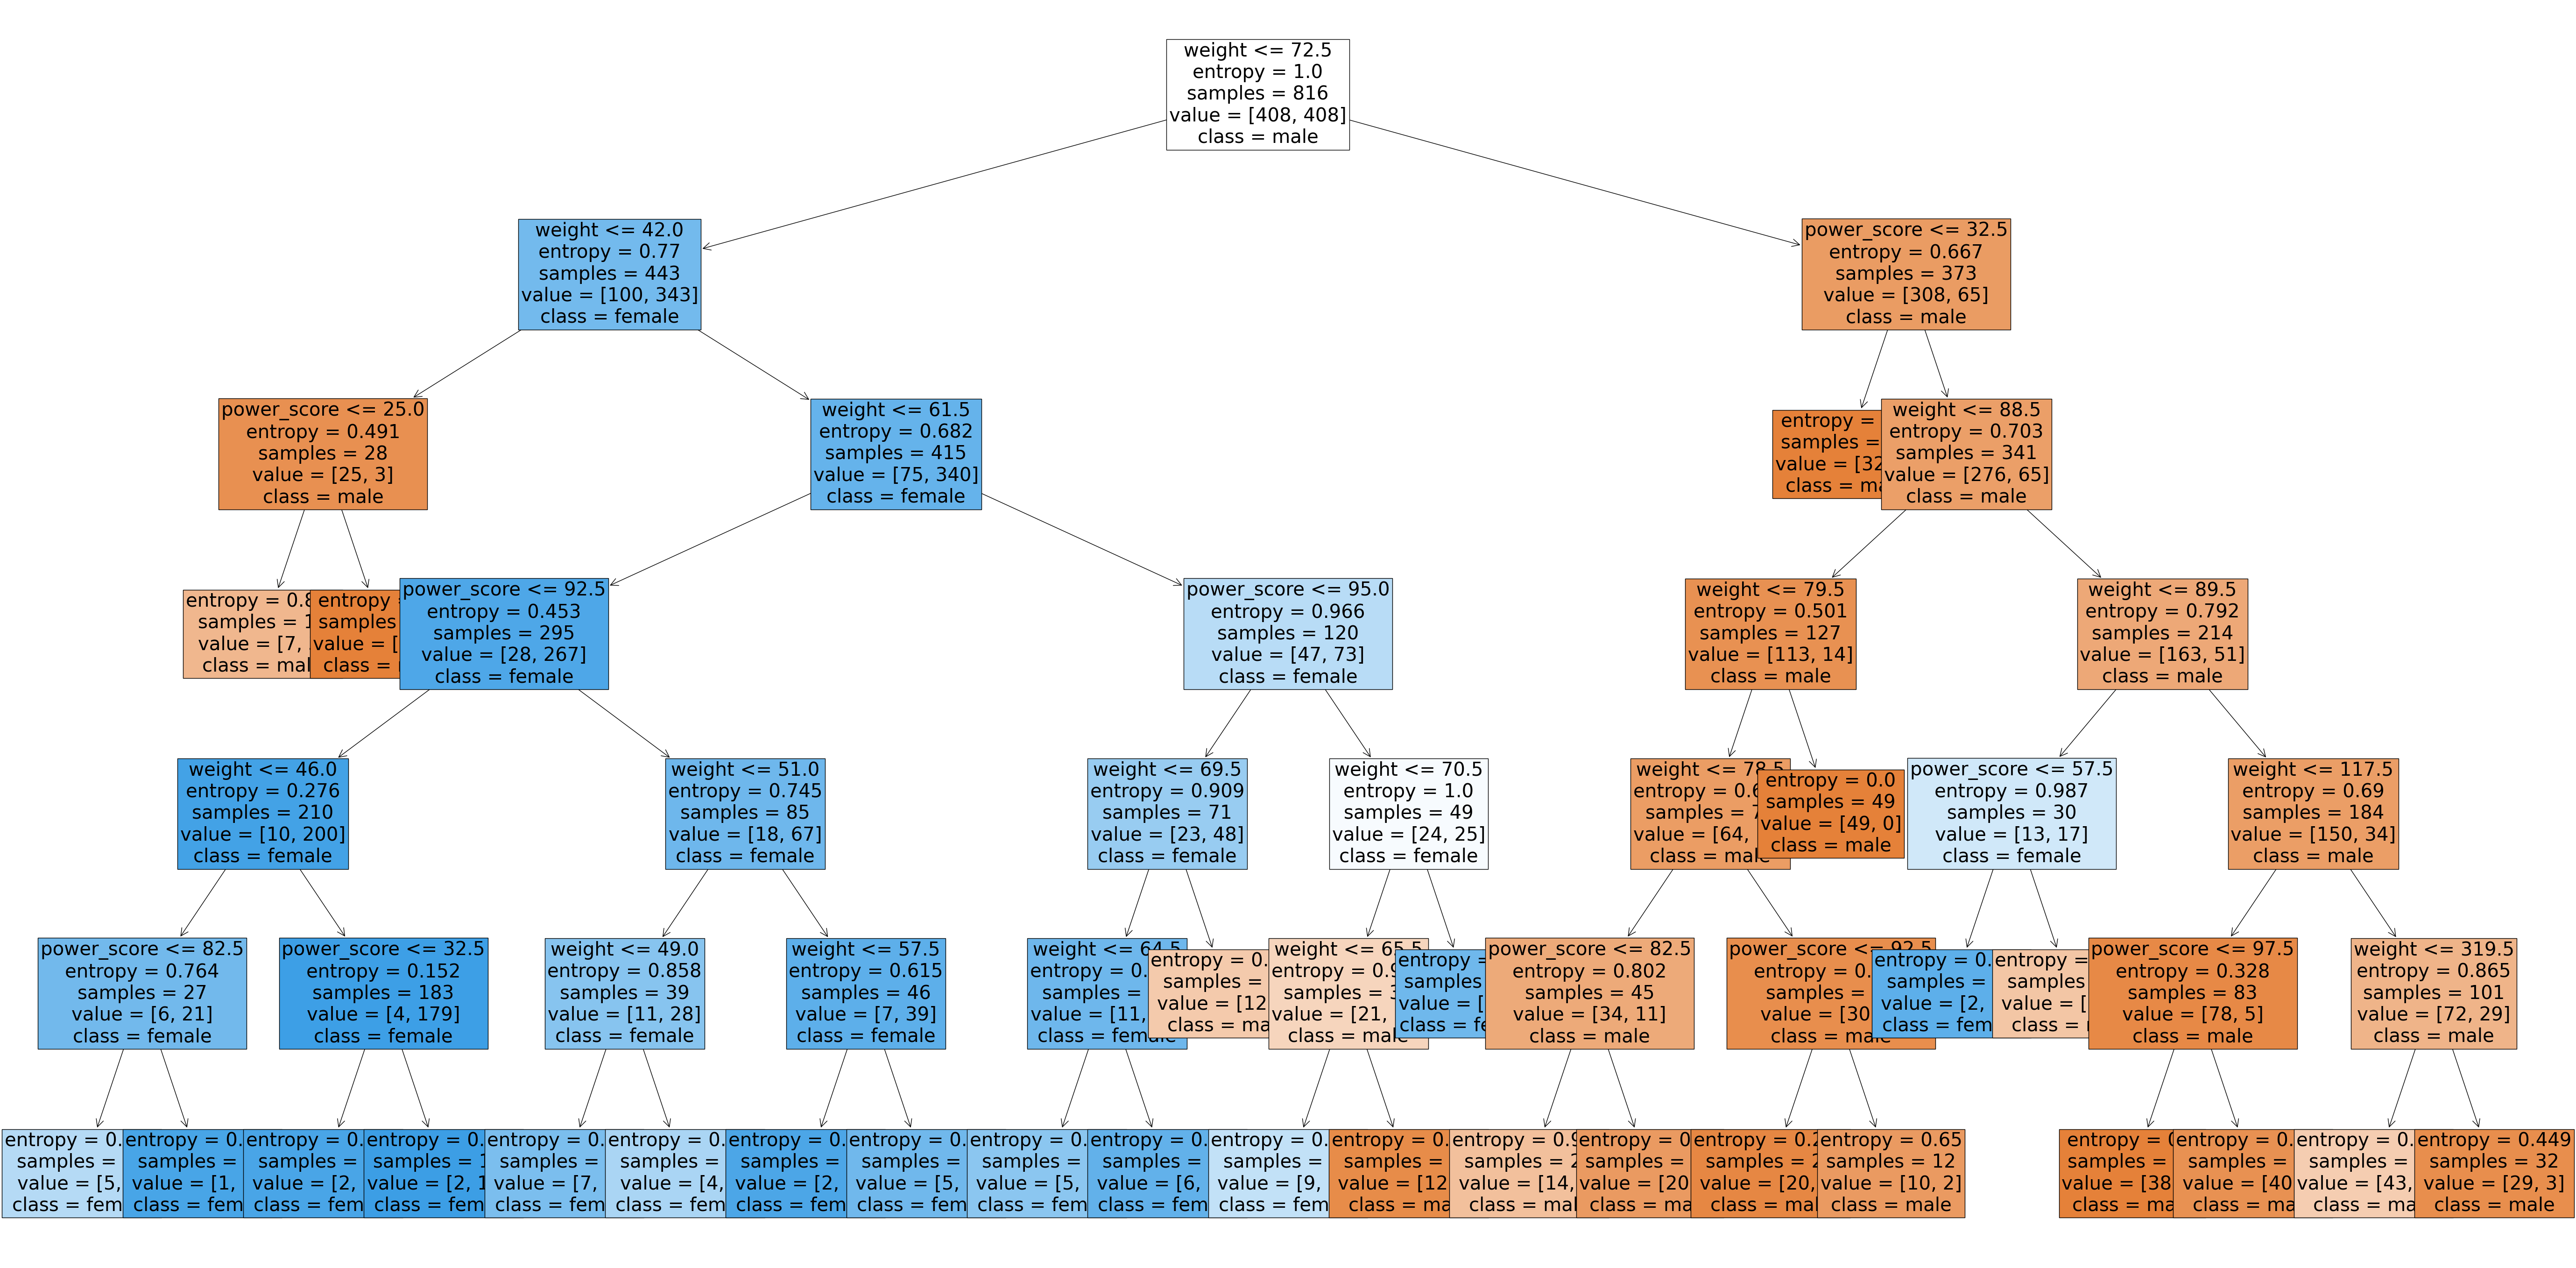

In [135]:
# draw a tree graph
fig = plt.figure(figsize=(70, 35))
_ = tree.plot_tree(decision, feature_names=list(tree_select),  
                   class_names=['male', 'female'],
                   fontsize = 29,
                   filled=True)

['weight', 'has_super_strength']


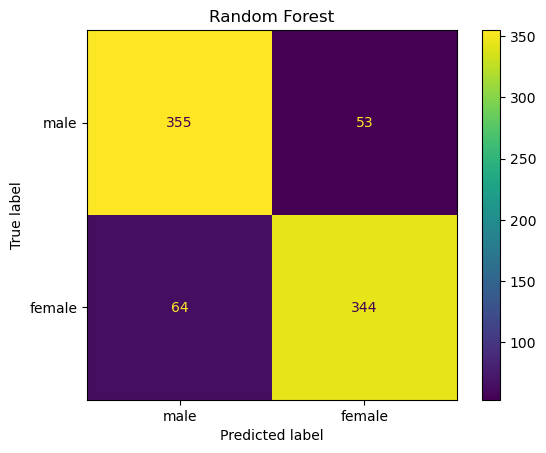

balanced accuracy: 0.8566176470588236
accuracy: 0.8566176470588235
precision: 0.8664987405541562
recall: 0.8431372549019608
f1: 0.8546583850931677


In [136]:
print(forest_select)
forest.fit(train_x[forest_select], train_y)
y_pred = forest.predict(train_x[forest_select])
plot_confusion(train_y, y_pred, "Random Forest")
score_metrics(train_y, y_pred)

['weight', 'type_race_inhuman', 'has_mind_control']


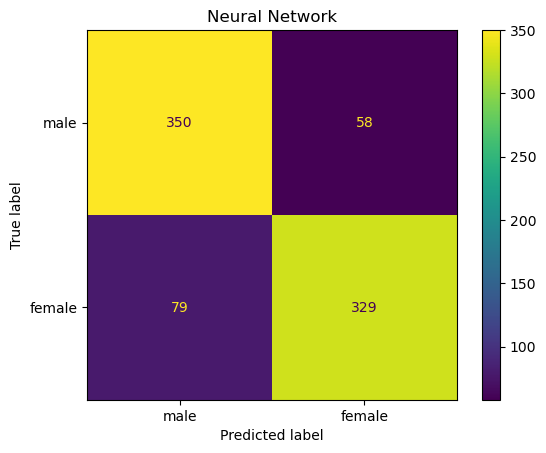

balanced accuracy: 0.8321078431372548
accuracy: 0.8321078431372549
precision: 0.8501291989664083
recall: 0.8063725490196079
f1: 0.8276729559748427


In [137]:
print(n_select)
neural.fit(train_x[n_select], train_y)
y_pred = neural.predict(train_x[n_select])
plot_confusion(train_y, y_pred, "Neural Network")
score_metrics(train_y, y_pred)

### 3.3 Model Performance on Testing Set

 # <font size="4.4">3.3.1 Score Metric</font>

# <font size="3.5">Controls</font>

In [138]:
# model predicts only male
onlyM = np.zeros(len(test_Y)) 
score_metrics(test_Y, onlyM)

balanced accuracy: 0.5
accuracy: 0.7405405405405405
precision: 0.0
recall: 0.0
f1: 0.0


In [139]:
# model predicts only female
onlyF = np.zeros(len(test_Y)) + 1
score_metrics(test_Y, onlyF)

balanced accuracy: 0.5
accuracy: 0.2594594594594595
precision: 0.2594594594594595
recall: 1.0
f1: 0.41201716738197425


In [140]:
# for each observation there is 50-50 chance
np.random.seed(11)
half = np.random.choice([0, 1], size=len(test_Y), p=[.5, .5])
score_metrics(test_Y, half)

balanced accuracy: 0.4554440389294404
accuracy: 0.4540540540540541
precision: 0.2268041237113402
recall: 0.4583333333333333
f1: 0.30344827586206896


In [141]:
# for each observation there is 75-25 chance (based on training data)
np.random.seed(11)
half = np.random.choice([0, 1], size=len(test_Y), p=[0.75, 0.25])
score_metrics(test_Y, half)

balanced accuracy: 0.4581812652068127
accuracy: 0.5783783783783784
precision: 0.2
recall: 0.20833333333333334
f1: 0.20408163265306126


# <font size="3.5">Classification Models</font>

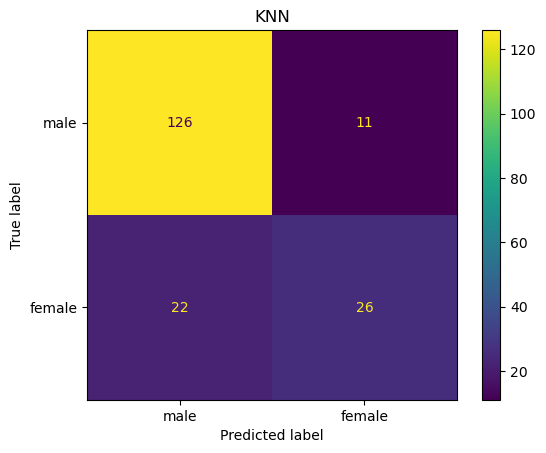

balanced accuracy: 0.7306873479318734
accuracy: 0.8216216216216217
precision: 0.7027027027027027
recall: 0.5416666666666666
f1: 0.611764705882353


In [142]:
# Nearest Neighbors
y_pred = knn.predict(test_x[knn_select])
plot_confusion(test_Y, y_pred, 'KNN')
score_metrics(test_Y, y_pred)

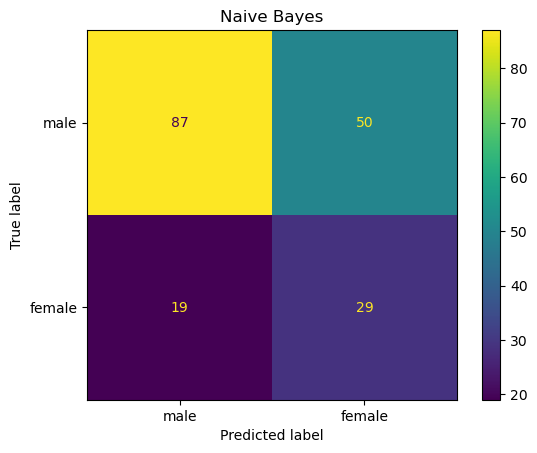

balanced accuracy: 0.6196015815085159
accuracy: 0.6270270270270271
precision: 0.3670886075949367
recall: 0.6041666666666666
f1: 0.45669291338582674


In [143]:
# Naive Bayes
y_pred = nbayes.predict(test_x[nb_select])
plot_confusion(test_Y, y_pred, 'Naive Bayes')
score_metrics(test_Y, y_pred)

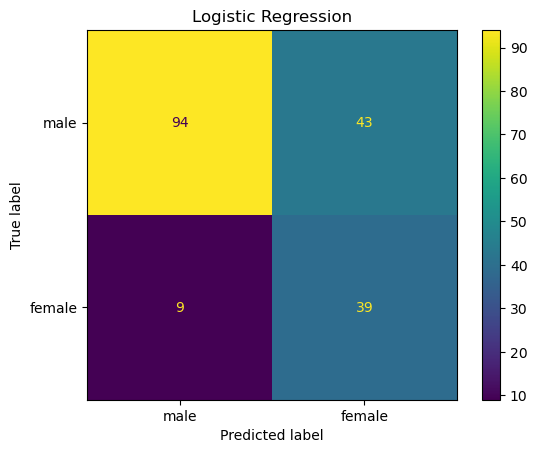

balanced accuracy: 0.749315693430657
accuracy: 0.7189189189189189
precision: 0.47560975609756095
recall: 0.8125
f1: 0.6


In [144]:
# Logistic Regression
y_pred = lreg.predict(test_x[log_select])
plot_confusion(test_Y, y_pred, 'Logistic Regression')
score_metrics(test_Y, y_pred)

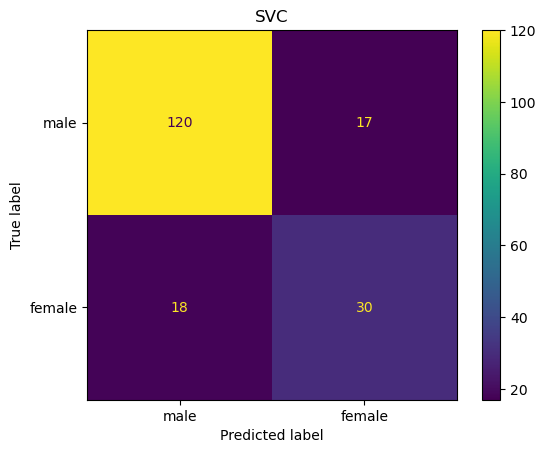

balanced accuracy: 0.7504562043795621
accuracy: 0.8108108108108109
precision: 0.6382978723404256
recall: 0.625
f1: 0.631578947368421


In [145]:
# Support Vector Classification
y_pred = svc.predict(test_x[svc_select])
plot_confusion(test_Y, y_pred, 'SVC')
score_metrics(test_Y, y_pred)

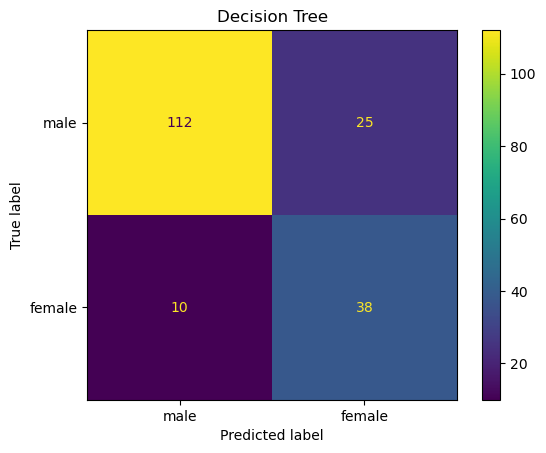

balanced accuracy: 0.8045924574209246
accuracy: 0.8108108108108109
precision: 0.6031746031746031
recall: 0.7916666666666666
f1: 0.6846846846846846


In [146]:
# Decision Tree
y_pred = decision.predict(test_x[tree_select])
plot_confusion(test_Y, y_pred, 'Decision Tree')
score_metrics(test_Y, y_pred)

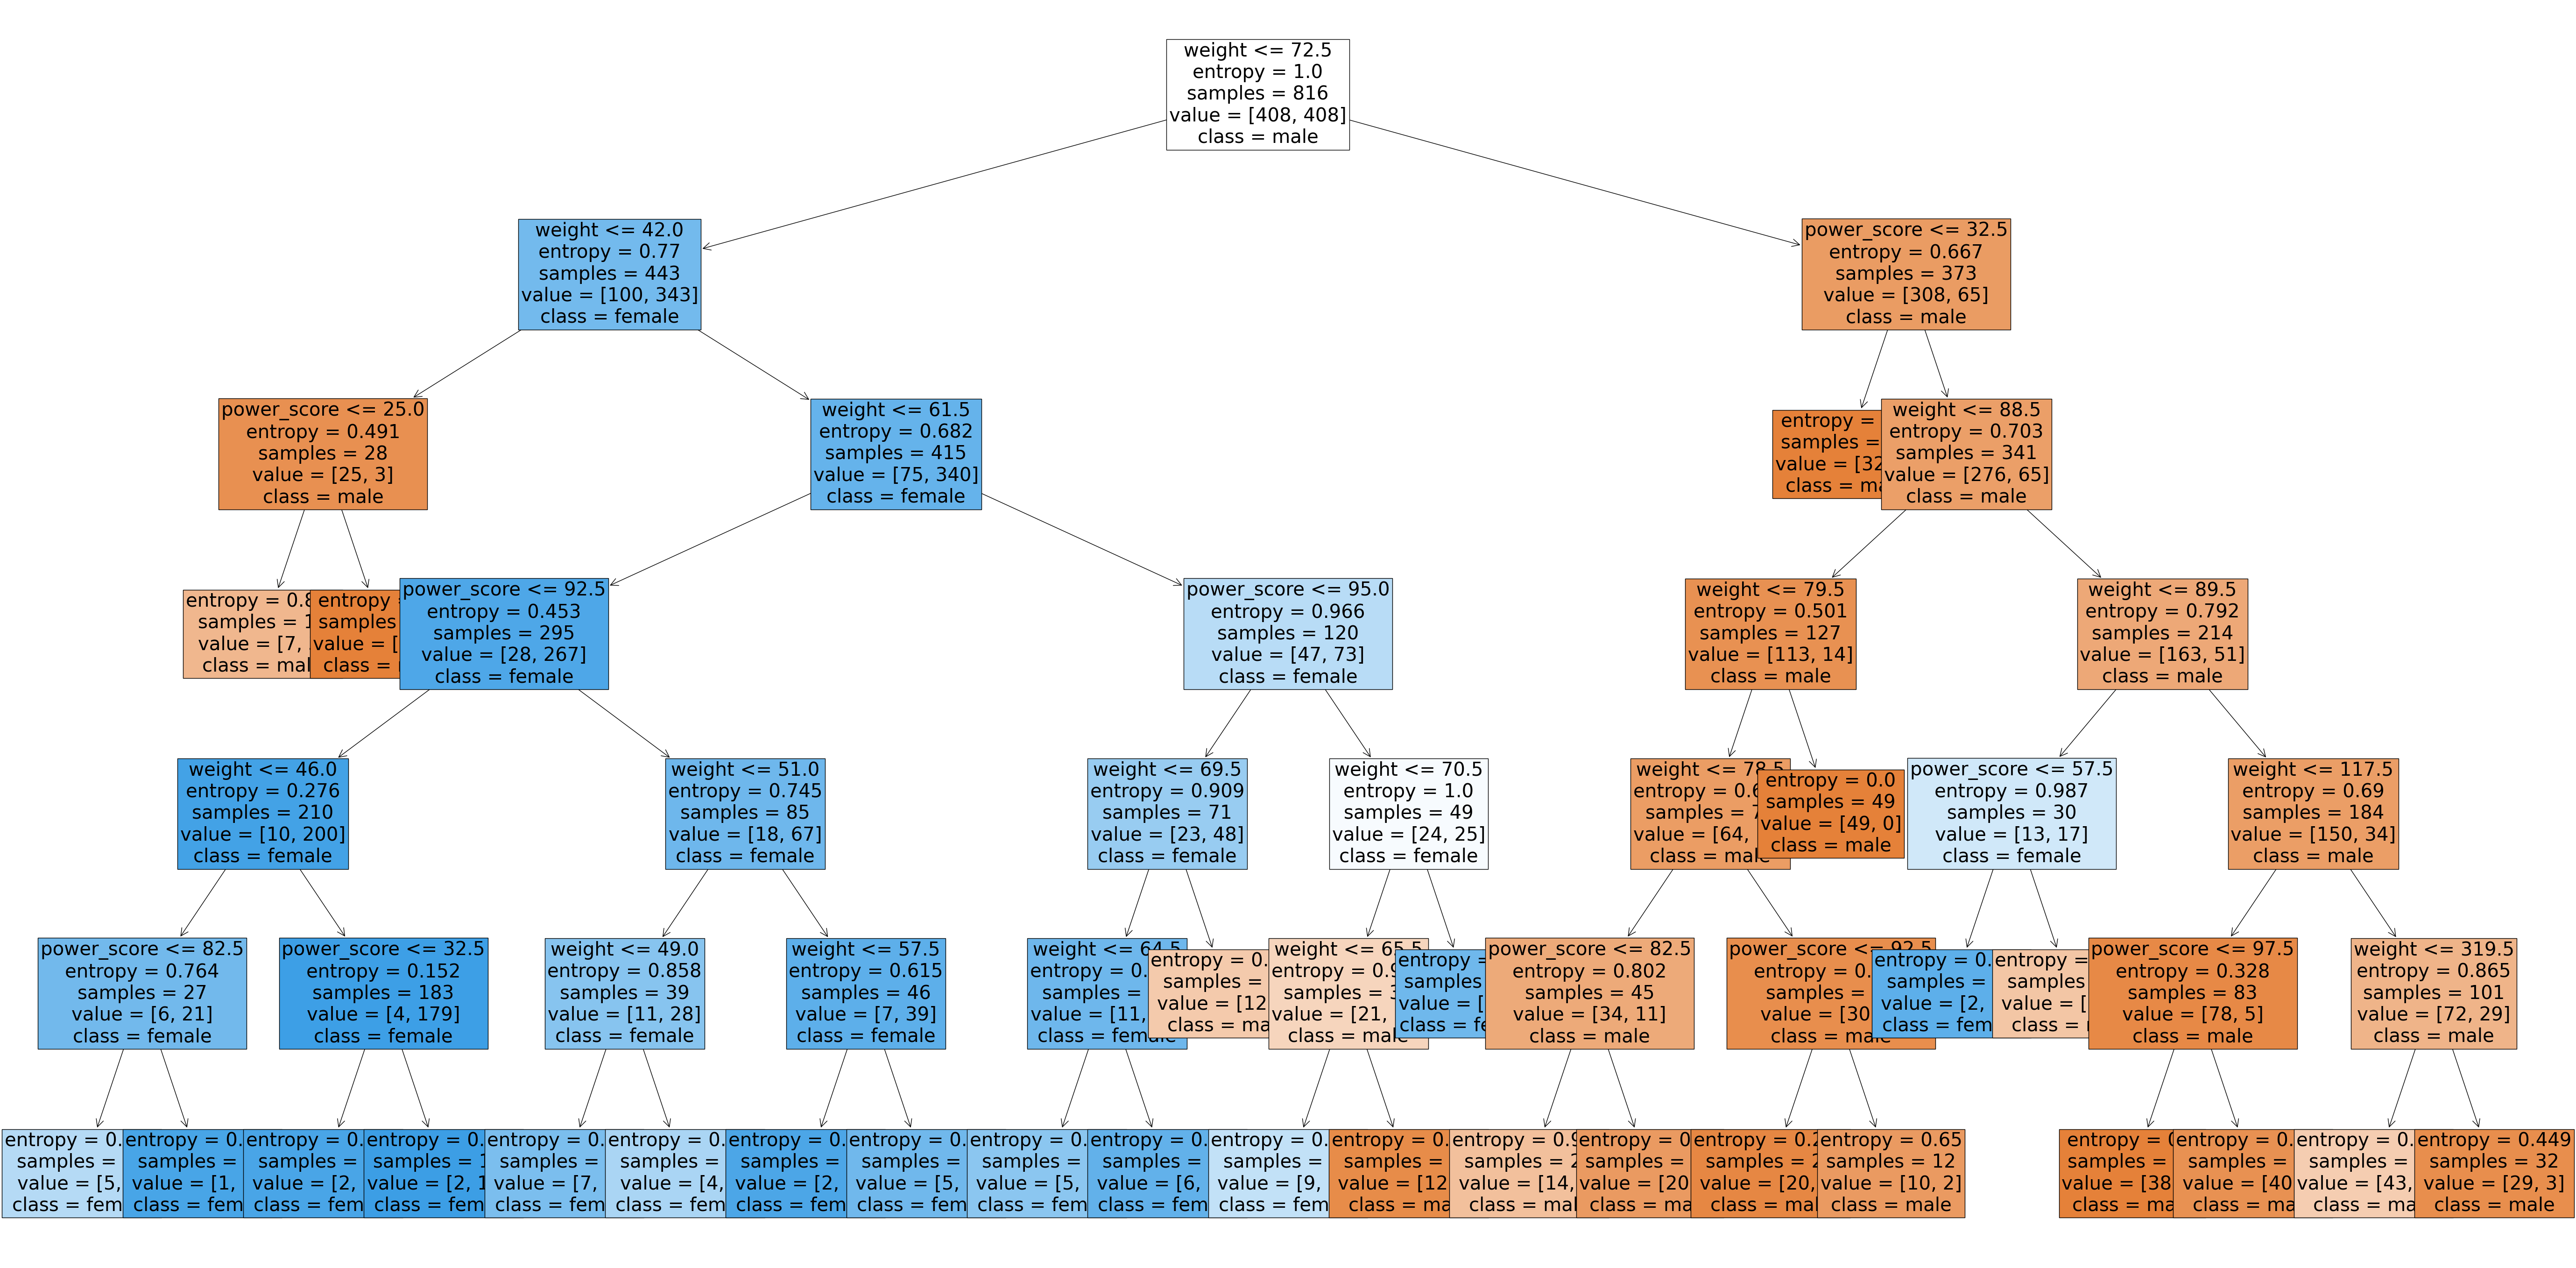

In [147]:
fig = plt.figure(figsize=(70, 35))
_ = tree.plot_tree(decision, feature_names=list(tree_select),  
                   class_names=['male', 'female'],
                   fontsize = 29,
                   filled=True)

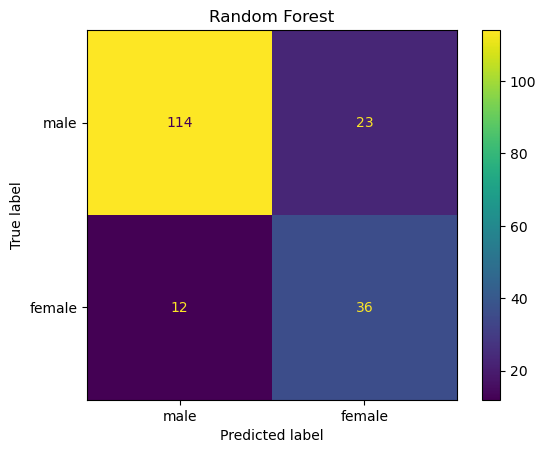

balanced accuracy: 0.791058394160584
accuracy: 0.8108108108108109
precision: 0.6101694915254238
recall: 0.75
f1: 0.6728971962616822


In [148]:
# Random Forest
y_pred = forest.predict(test_x[forest_select])
plot_confusion(test_Y, y_pred, 'Random Forest')
score_metrics(test_Y, y_pred)

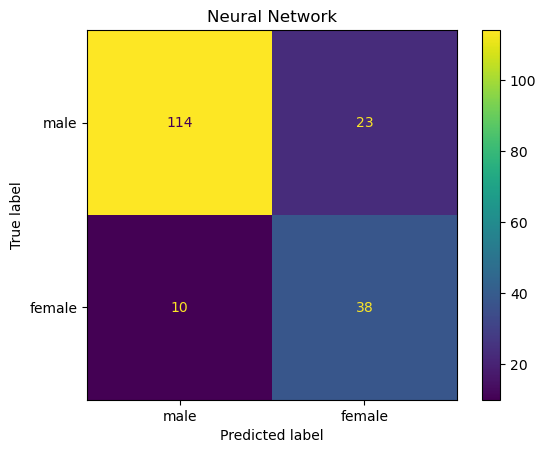

balanced accuracy: 0.8118917274939172
accuracy: 0.8216216216216217
precision: 0.6229508196721312
recall: 0.7916666666666666
f1: 0.6972477064220183


In [149]:
# Neural Network
y_pred = neural.predict(test_x[n_select])
plot_confusion(test_Y, y_pred, 'Neural Network')
score_metrics(test_Y, y_pred)

 # <font size="4.4">3.3.2 ROC Curve</font>

<Figure size 640x480 with 0 Axes>

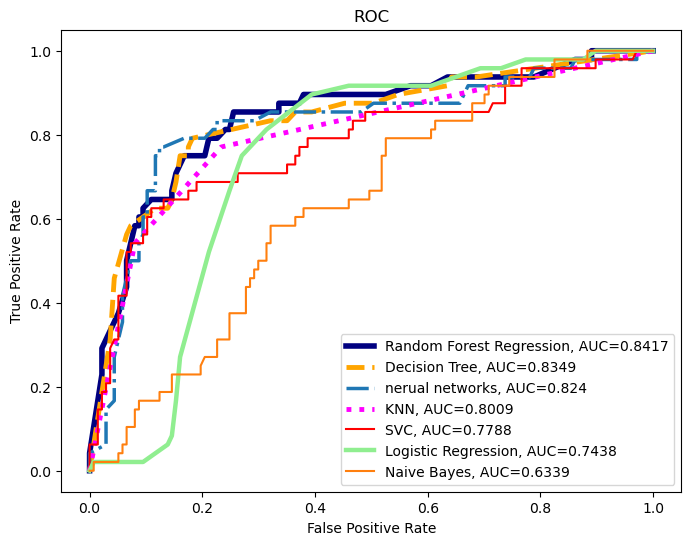

In [150]:
plt.figure(0).clf()
plt.figure(figsize=(8,6))

y_pred_prob = forest.predict_proba(test_x[forest_select])[::,1]
fpr, tpr, thresholds = roc_curve(test_Y,  y_pred_prob)
auc = round(metrics.roc_auc_score(test_Y, y_pred_prob), 4)
plt.plot(fpr,tpr,label="Random Forest Regression, AUC="+str(auc),
         color="navy",linewidth=4)

y_pred_prob = decision.predict_proba(test_x[tree_select])[::,1]
fpr, tpr, thresholds = roc_curve(test_Y,  y_pred_prob)
auc = round(metrics.roc_auc_score(test_Y, y_pred_prob), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc),
         color="orange",linestyle="dashed",linewidth=3.5)

y_pred_prob = neural.predict_proba(test_x[n_select])[::,1]
fpr, tpr, thresholds = roc_curve(test_Y,  y_pred_prob)
auc = round(metrics.roc_auc_score(test_Y, y_pred_prob), 4)
plt.plot(fpr,tpr,label="nerual networks, AUC="+str(auc),
         linestyle="dashdot",linewidth=2.5)

y_pred_prob = knn.predict_proba(test_x[knn_select])[::,1]
fpr, tpr, thresholds = roc_curve(test_Y,  y_pred_prob)
auc = round(metrics.roc_auc_score(test_Y, y_pred_prob), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc),
         color="magenta",linestyle="dotted",linewidth=3.5)

y_pred_prob = svc.predict_proba(test_x[svc_select])[::,1]
fpr, tpr, thresholds = roc_curve(test_Y,  y_pred_prob)
auc = round(metrics.roc_auc_score(test_Y, y_pred_prob), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc), color = 'red')

y_pred_prob = lreg.predict_proba(test_x[log_select])[::,1]
fpr, tpr, thresholds = roc_curve(test_Y,  y_pred_prob)
auc = round(metrics.roc_auc_score(test_Y, y_pred_prob), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc),
         color="lightgreen", linewidth = 3.2)

y_pred_prob = nbayes.predict_proba(test_x[nb_select])[::,1]
fpr, tpr, thresholds = roc_curve(test_Y,  y_pred_prob)
auc = round(metrics.roc_auc_score(test_Y, y_pred_prob), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.savefig('ROC.png')